# Final project for a course on methods for detecting cyber attacks

Student ID: 207276775

GitHub project: https://github.com/RazElbaz/Final-project-Malicious-video-learning-machine

The site that helped me find algorithms: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [1]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import numpy as np
import sys
import os, time
import platform
import datetime

# Data exploration

### Explore the data, understand the featues, statistics visualize the inputs

### What is Data Exploration?

Data exploration definition: Data exploration refers to the initial step in data analysis in which data analysts use data visualization and statistical techniques to describe dataset characterizations, such as size, quantity, and accuracy, in order to better understand the nature of the data.

https://www.heavy.ai/learn/data-exploration 

### Why Is Data Exploration Important? 

Exploration allows for deeper understanding of a dataset, making it easier to navigate and use the data later. The better an analyst knows the data they're working with, the better their analysis will be.

https://www.alteryx.com/glossary/data-exploration

## Creation and update times of the files

In [2]:
files = Path("/home/raz/Desktop/final/all").glob('*')
min=10000000
max=0
for file in files:
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    print("Last modified: %s" % time.ctime(os.path.getmtime(file)))
    print("Created: %s" % time.ctime(os.path.getctime(file)))

Last modified: Thu Aug  4 19:45:14 2022
Created: Sat Feb 11 14:28:21 2023
Last modified: Thu Aug  4 19:44:42 2022
Created: Sat Feb 11 14:28:14 2023
Last modified: Sat Feb 11 13:33:03 2023
Created: Sat Feb 11 14:29:18 2023
Last modified: Thu Aug  4 19:46:50 2022
Created: Sat Feb 11 14:28:46 2023
Last modified: Thu Aug  4 19:46:48 2022
Created: Sat Feb 11 14:28:45 2023
Last modified: Thu Aug  4 19:48:08 2022
Created: Sat Feb 11 14:29:09 2023
Last modified: Sat Feb 11 13:57:47 2023
Created: Sat Feb 11 14:28:11 2023
Last modified: Thu Aug  4 19:44:54 2022
Created: Sat Feb 11 14:28:16 2023
Last modified: Thu Aug  4 19:43:28 2022
Created: Sat Feb 11 14:29:39 2023
Last modified: Sat Feb 11 14:04:53 2023
Created: Sat Feb 11 14:28:12 2023
Last modified: Sat Feb 11 13:47:45 2023
Created: Sat Feb 11 14:28:09 2023
Last modified: Sat Feb 11 14:00:36 2023
Created: Sat Feb 11 14:28:12 2023
Last modified: Sat Nov  5 16:06:24 2022
Created: Sat Feb 11 14:28:23 2023
Last modified: Sat Feb 11 13:33:03 202

## Files size

In [3]:
files = Path("//home/raz/Desktop/final/all").glob('*')
for file_name in files:
    file_stats = os.stat(file_name)
    print(file_stats)
    print(f'File Size in Bytes is {file_stats.st_size}')

os.stat_result(st_mode=33204, st_ino=5506929, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=17534522, st_atime=1676118501, st_mtime=1659631514, st_ctime=1676118501)
File Size in Bytes is 17534522
os.stat_result(st_mode=33204, st_ino=5506916, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=23512815, st_atime=1676118516, st_mtime=1659631482, st_ctime=1676118494)
File Size in Bytes is 23512815
os.stat_result(st_mode=33204, st_ino=5507126, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=688034, st_atime=1676118584, st_mtime=1676115183, st_ctime=1676118558)
File Size in Bytes is 688034
os.stat_result(st_mode=33204, st_ino=5507028, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=24950011, st_atime=1676118526, st_mtime=1659631610, st_ctime=1676118526)
File Size in Bytes is 24950011
os.stat_result(st_mode=33204, st_ino=5507027, st_dev=2053, st_nlink=1, st_uid=1000, st_gid=1000, st_size=22276786, st_atime=1676118525, st_mtime=1659631608, st_ctime=16

check min and max file size:

In [4]:
files = Path("/home/raz/Desktop/final/all").glob('*')
min=10000000
max=0
for file in files:
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    if size<min:
        min=size
    if size>max:
        max=size
        
        
print(min)
print(max)

17069
30217369


## Video Metadata 

In [5]:
#!conda install ffmpeg

In [6]:
import ffmpeg
import sys
from pprint import pprint # for printing Python dictionaries in a human-readable way
from pathlib import Path

import json

In [7]:
files = Path("/home/raz/Desktop/final/all").glob('*')
dict={}
i=0
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    print(file)
    pprint(ffmpeg.probe(file)["streams"])
    dict[i]=ffmpeg.probe(file)["streams"]
    i+=1

# https://www.geeksforgeeks.org/reading-and-writing-json-to-a-file-in-python/
json_object = json.dumps(dict)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)


/home/raz/Desktop/final/all/A1606b0e6_0 (42).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '4672498',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

/home/raz/Desktop/final/all/test (28).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '5658925',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames'

/home/raz/Desktop/final/all/A1606b0e6_0 (21).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '7101510',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

/home/raz/Desktop/final/all/B1606b0e6_1 (58).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '6600664',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

[{'avg_frame_rate': '25/1',
  'bit_rate': '5658925',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profil

[{'avg_frame_rate': '29/1',
  'bit_rate': '188065',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/58',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 512,
  'display_aspect_ratio': '25:18',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 1,
  'height': 360,
  'index': 0,
  'is_avc': 'true',
  'level': 30,
  'nal_length_size': '4',
  'nb_frames': '870',
 

/home/raz/Desktop/final/all/malware22.mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '328165',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 480,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '23.800000',
  'duration_ts': 304640,
  'has_b_frames': 2,
  'height': 360,
  'index': 0,
  'is_avc': 'true',
  'level': 21,
  'nal_length_size': '4',
  'nb_frames': '5

[{'avg_frame_rate': '25/1',
  'bit_rate': '5975133',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '6227808',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '5865971',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profil

[{'avg_frame_rate': '25/1',
  'bit_rate': '6119065',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profil

/home/raz/Desktop/final/all/B1606b0e6_1 (52).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '6810212',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

[{'avg_frame_rate': '25/1',
  'bit_rate': '6508603',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '395414',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 480,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '7.920000',
  'duration_ts': 101376,
  'has_b_frames': 2,
  'height': 360,
  'index': 0,
  'is_avc': 'true',
  'level': 21,
  'nal_length_size': '4',
  'nb_frames': '198',
  'pix_fmt': 'yuv420p',
  'profile': '

/home/raz/Desktop/final/all/B1606b0e6_1 (69).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '6851573',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

[{'avg_frame_rate': '25/1',
  'bit_rate': '264464',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 480,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '21.880000',
  'duration_ts': 280064,
  'has_b_frames': 2,
  'height': 360,
  'index': 0,
  'is_avc': 'true',
  'level': 21,
  'nal_length_size': '4',
  'nb_frames': '547',
  'pix_fmt': 'yuv420p',
  'profile': 

/home/raz/Desktop/final/all/malware11.mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '229214',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 544,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '7.680000',
  'duration_ts': 98304,
  'has_b_frames': 2,
  'height': 360,
  'index': 0,
  'is_avc': 'true',
  'level': 21,
  'nal_length_size': '4',
  'nb_frames': '192

/home/raz/Desktop/final/all/On Time Percentage_ 100%.mp4
[{'avg_frame_rate': '49680000/1713103',
  'bit_rate': '200039',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1713103/99360000',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 512,
  'display_aspect_ratio': '25:18',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '19.034478',
  'duration_ts': 1713103,
  'has_b_frames': 1,
  'height': 360,
  'index': 0,
  '

/home/raz/Desktop/final/all/A1606b0e6_0 (69).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '5406347',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

/home/raz/Desktop/final/all/test (22).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '5266382',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames'

[{'avg_frame_rate': '25/1',
  'bit_rate': '5511671',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '29.960000',
  'duration_ts': 2696400,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '749',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '4863678',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '29.960000',
  'duration_ts': 2696400,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '749',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '6803216',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

/home/raz/Desktop/final/all/It's the Appetizer!.mp4
[{'avg_frame_rate': '30/1',
  'bit_rate': '279394',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/60',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 480,
  'display_aspect_ratio': '4:3',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '8.533333',
  'duration_ts': 768000,
  'has_b_frames': 1,
  'height': 360,
  'index': 0,
  'is_avc': 'true',
  'level': 30,
 

[{'avg_frame_rate': '25/1',
  'bit_rate': '5729124',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '29.960000',
  'duration_ts': 2696400,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '749',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '6504563',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '30/1',
  'bit_rate': '11397433',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/60',
  'codec_type': 'video',
  'coded_height': 720,
  'coded_width': 1280,
  'color_primaries': 'bt709',
  'color_range': 'tv',
  'color_space': 'bt709',
  'color_transfer': 'bt709',
  'display_aspect_ratio': '16:9',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '1.533333',
  'duration_ts': 23552,
  'has_b_frames': 2,
  'heigh

[{'avg_frame_rate': '25/1',
  'bit_rate': '196242',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 320,
  'coded_width': 640,
  'display_aspect_ratio': '160:77',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '18.320000',
  'duration_ts': 1648800,
  'has_b_frames': 1,
  'height': 308,
  'index': 0,
  'is_avc': 'true',
  'level': 22,
  'nal_length_size': '4',
  'nb_frames': '458',


[{'avg_frame_rate': '25/1',
  'bit_rate': '5709660',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profil

[{'avg_frame_rate': '25/1',
  'bit_rate': '4807379',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '29.960000',
  'duration_ts': 2696400,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '749',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '3971019',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '29.960000',
  'duration_ts': 2696400,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '749',
  'pix_fmt': 'yuv420p',
  'profi

/home/raz/Desktop/final/all/Hey, buddy! I warmed it up for ya!.mp4
[{'avg_frame_rate': '30/1',
  'bit_rate': '281725',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/60',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 480,
  'display_aspect_ratio': '4:3',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '13.066667',
  'duration_ts': 1176000,
  'has_b_frames': 1,
  'height': 360,
  'index': 0,
  'is_avc': 'true',

[{'avg_frame_rate': '25/1',
  'bit_rate': '5211119',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '24/1',
  'bit_rate': '171138',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/48',
  'codec_type': 'video',
  'coded_height': 320,
  'coded_width': 320,
  'color_primaries': 'bt709',
  'color_range': 'tv',
  'color_space': 'bt709',
  'color_transfer': 'bt709',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '12.791667',
  'duration_ts': 7675,
  'has_b_frames': 2,
  'height': 320,
  'index': 0,
  'is_avc': 't

[{'avg_frame_rate': '454421/18925',
  'bit_rate': '72746',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '18925/908842',
  'codec_type': 'video',
  'coded_height': 480,
  'coded_width': 480,
  'display_aspect_ratio': '1:1',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '31.567973',
  'duration_ts': 605600,
  'has_b_frames': 2,
  'height': 480,
  'index': 0,
  'is_avc': 'true',
  'level': 30,
  'nal_length_size': '4',
  'nb_frame

/home/raz/Desktop/final/all/test (3).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '4842131',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames':

[{'avg_frame_rate': '30000/1001',
  'bit_rate': '891358',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1001/60000',
  'codec_type': 'video',
  'coded_height': 720,
  'coded_width': 1280,
  'color_primaries': 'bt709',
  'color_range': 'tv',
  'color_space': 'bt709',
  'color_transfer': 'bt709',
  'display_aspect_ratio': '16:9',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '17.083733',
  'duration_ts': 512512,
  'has_b_frames':

/home/raz/Desktop/final/all/27.mp4
[{'avg_frame_rate': '30/1',
  'bit_rate': '213834',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/60',
  'codec_type': 'video',
  'coded_height': 720,
  'coded_width': 1280,
  'color_primaries': 'smpte170m',
  'color_range': 'tv',
  'color_space': 'smpte170m',
  'color_transfer': 'bt709',
  'display_aspect_ratio': '16:9',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '7.000000',
  'duration_

[{'avg_frame_rate': '25/1',
  'bit_rate': '6347171',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '5991570',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

/home/raz/Desktop/final/all/test (10).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '7927637',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames

/home/raz/Desktop/final/all/A1606b0e6_0 (36).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '7038471',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

[{'avg_frame_rate': '25/1',
  'bit_rate': '4842131',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profil

/home/raz/Desktop/final/all/B1606b0e6_1 (29).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '6682286',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

[{'avg_frame_rate': '73080000/2519999',
  'bit_rate': '295913',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '2519999/146160000',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 512,
  'display_aspect_ratio': '25:18',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '27.999989',
  'duration_ts': 2519999,
  'has_b_frames': 1,
  'height': 360,
  'index': 0,
  'is_avc': 'true',
  'level': 30,
  'nal_length_size': '4'

/home/raz/Desktop/final/all/test (32).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '5765676',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 384000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 40,
  'nal_length_size': '4',
  'nb_frames'

[{'avg_frame_rate': '25/1',
  'bit_rate': '816463',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 720,
  'coded_width': 1280,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '20.480000',
  'duration_ts': 262144,
  'has_b_frames': 2,
  'height': 720,
  'index': 0,
  'is_avc': 'true',
  'level': 31,
  'nal_length_size': '4',
  'nb_frames': '512',
  'pix_fmt': 'yuv420p',
  'profile':

[{'avg_frame_rate': '25/1',
  'bit_rate': '6666879',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '537564',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 368,
  'coded_width': 640,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '10.960000',
  'duration_ts': 140288,
  'has_b_frames': 2,
  'height': 360,
  'index': 0,
  'is_avc': 'true',
  'level': 30,
  'nal_length_size': '4',
  'nb_frames': '274',
  'pix_fmt': 'yuv420p',
  'profile': 

/home/raz/Desktop/final/all/B1606b0e6_1 (47).mp4
[{'avg_frame_rate': '25/1',
  'bit_rate': '5410350',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb

/home/raz/Desktop/final/all/46.mp4
[{'avg_frame_rate': '30/1',
  'bit_rate': '5265162',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/60',
  'codec_type': 'video',
  'coded_height': 1024,
  'coded_width': 576,
  'display_aspect_ratio': '9:16',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '4.900000',
  'duration_ts': 147000,
  'has_b_frames': 0,
  'height': 1024,
  'index': 0,
  'is_avc': 'true',
  'level': 32,
  'nal_length_

[{'avg_frame_rate': '25/1',
  'bit_rate': '4784966',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '29.960000',
  'duration_ts': 2696400,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '749',
  'pix_fmt': 'yuv420p',
  'profi

[{'avg_frame_rate': '25/1',
  'bit_rate': '6910503',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1920,
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '30.000000',
  'duration_ts': 2700000,
  'has_b_frames': 2,
  'height': 1080,
  'index': 0,
  'is_avc': 'true',
  'level': 50,
  'nal_length_size': '4',
  'nb_frames': '750',
  'pix_fmt': 'yuv420p',
  'profi

## DataFrame head and tail

pandas. head () function is used to access the first n rows of a dataframe or series. It returns a smaller version of the caller object with the first few entries.

pandas.DataFrame.tail
DataFrame.tail(n=5) -> Return the last n rows.

This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.

For negative values of n, this function returns all rows except the first |n| rows, equivalent to df[|n|:].
If n is larger than the number of rows, this function returns all rows.

In [8]:
files = Path("/home/raz/Desktop/final/all").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    print("----------------------------------------------------------------------------------------")
    print(df.head())
    print("----------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  4672498   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  640.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        560   
1                  NaN        719   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6929521   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  4876157   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  4945958   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5975133   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  7081449   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6296532   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  6318534   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   
2      2        NaN                                        NaN     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1280.0   720.0   
1      audio         1/48000             mp4a  0x6134706d     NaN     NaN   
2       data             NaN             tmcd  0x64636d74     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8         46   
1  ...                  NaN         72   
2  ...                  NaN          1   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub':

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  480.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    164532                    8        628   
1    125679                  NaN        902   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2017-10-27T23:40:20.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6554221   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5266382   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  544.0   306.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        812   
1                  NaN       1401   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'creation_time': '2010-05-20T08:21:12.000000Z...        NaN         NaN   
1  {'

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)  HE-AAC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video   27817/2949120             avc1  0x31637661  728.0   720.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        384   
1                  NaN        276   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  3519905   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  480.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    274409                    8        333   
1    125697                  NaN        574   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2017-10-13T20:29:22.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  4807379   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  3971019   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  640.0   640.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8         62   
1                  NaN         80   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  7320944   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  480.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        445   
1                  NaN        683   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6215114   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  4903426   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  7927637   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video      1001/60000             avc1  0x31637661  482.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0     77032                    8        469   
1    128187                  NaN        674   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2023-01-08T05:35:25.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   
2      2        NaN                                        NaN     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1280.0   720.0   
1      audio         1/48000             mp4a  0x6134706d     NaN     NaN   
2       data             NaN             tmcd  0x64636d74     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8         46   
1  ...                  NaN         72   
2  ...                  NaN          1   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub':

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/50             avc1  0x31637661  1280.0   720.0   
1      audio         1/44100             mp4a  0x6134706d     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8        512   
1  ...                  NaN        658   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   


----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  640.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        274   
1                  NaN        354   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6019332   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5398161   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

In [9]:
files = Path("/home/raz/Desktop/final/all").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    print("----------------------------------------------------------------------------------------")
    print(df.tail())
    print("----------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  4672498   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  640.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        560   
1                  NaN        719   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1280.0   720.0   
1      audio         1/44100             mp4a  0x6134706d     NaN     NaN   

   ...  bit_rate  bits_per_raw_sample  nb_frames  \
0  ...   1727608                    8        503   
1  ...    125598                  NaN        723   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2016-08-15T12:53:42.000000Z.

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  4876157   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/58             avc1  0x31637661  500.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    188065                    8        870   
1    125734                  NaN       1292   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2018-11-09T01:57:36.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6536241   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6227808   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6669531   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5017672   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/48             avc1  0x31637661  1280.0   720.0   
1      audio         1/44100             mp4a  0x6134706d     NaN     NaN   

   ...  bit_rate  bits_per_raw_sample  nb_frames  \
0  ...   1323945                    8        399   
1  ...    128140                  NaN        716   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2018-12-04T02:52:58.000000Z.

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5381217   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5331588   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6554221   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5266382   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  4863678   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  960.0   720.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        554   
1                  NaN        887   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  7165966   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type    codec_time_base codec_tag_string   codec_tag  width  height  \
0      video  2343103/135900000             avc1  0x31637661  480.0   360.0   
1      audio            1/44100             mp4a  0x6134706d    NaN     NaN   

   ...  bit_rate  bits_per_raw_sample  nb_frames  \
0  ...    128947                    8        755   
1  ...    125674                  NaN       1122   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2017-10-25T12:33:04.00

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  480.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    298402                    8        496   
1    125617                  NaN        713   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2016-09-04T02:50:57.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  3971019   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  640.0   640.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8         62   
1                  NaN         80   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6497623   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  4999034   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5210459   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5991570   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5765676   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video  139259/4177920             avc1  0x31637661  474.0   474.0  ...   
1      audio         1/48000             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        272   
1                  NaN        849   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...        NaN         NaN   
1  {'

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  360.0   360.0  ...   
1      audio         1/48000             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8         52   
1                  NaN         88   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'ISO Media...        NaN         NaN   
1  {'

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/50             avc1  0x31637661  1280.0   720.0   
1      audio         1/44100             mp4a  0x6134706d     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8        512   
1  ...                  NaN        658   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   


----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  640.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        274   
1                  NaN        354   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6865680   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5398161   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

### As you can see, we discovered in the tail that not all files contain only audio or video, some also contain other types of files, such as data, which should make us suspect that this is a malicious video.

## Data type
pandas.DataFrame.dtypes
property DataFrame.dtypes[source]
Return the dtypes in the DataFrame.

This returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype. See the User Guide for more.

In [10]:
files = Path("/home/raz/Desktop/final/all").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    print("----------------------------------------------------------------------------------------")
    print(df.dtypes)
    print("----------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                     int64
codec_name               object
codec_long_name          object
profile                  object
codec_type               object
codec_time_base          object
codec_tag_string         object
codec_tag                object
width                   float64
height                  float64
coded_width             float64
coded_height            float64
has_b_frames            float64
sample_aspect_ratio      object
display_aspect_ratio     object
pix_fmt                  object
level                   float64
chroma_location          object
refs                    float64
is_avc                   object
nal_length_size          object
r_frame_rate             object
avg_frame_rate           object
time_base                object
start_pts                 int64
start_time               object
duration_ts               int64
duration                 object
bit_rate       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                    int64
codec_name              object
codec_long_name         object
profile                 object
codec_type              object
codec_time_base         object
codec_tag_string        object
codec_tag               object
width                  float64
height                 float64
coded_width            float64
coded_height           float64
has_b_frames           float64
pix_fmt                 object
level                  float64
chroma_location         object
refs                   float64
is_avc                  object
nal_length_size         object
r_frame_rate            object
avg_frame_rate          object
time_base               object
start_pts                int64
start_time              object
duration_ts              int64
duration                object
bit_rate                object
bits_per_raw_sample     object
nb_frames               object
disposition 

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                     int64
codec_name               object
codec_long_name          object
profile                  object
codec_type               object
codec_time_base          object
codec_tag_string         object
codec_tag                object
width                   float64
height                  float64
coded_width             float64
coded_height            float64
has_b_frames            float64
sample_aspect_ratio      object
display_aspect_ratio     object
pix_fmt                  object
level                   float64
chroma_location          object
refs                    float64
is_avc                   object
nal_length_size          object
r_frame_rate             object
avg_frame_rate           object
time_base                object
start_pts                 int64
start_time               object
duration_ts               int64
duration                 object
bit_rate       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                     int64
codec_name               object
codec_long_name          object
profile                  object
codec_type               object
codec_time_base          object
codec_tag_string         object
codec_tag                object
width                   float64
height                  float64
coded_width             float64
coded_height            float64
has_b_frames            float64
sample_aspect_ratio      object
display_aspect_ratio     object
pix_fmt                  object
level                   float64
color_range              object
color_space              object
color_transfer           object
color_primaries          object
chroma_location          object
refs                    float64
is_avc                   object
nal_length_size          object
r_frame_rate             object
avg_frame_rate           object
time_base                object
start_pts      

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                    int64
codec_name              object
codec_long_name         object
profile                 object
codec_type              object
codec_time_base         object
codec_tag_string        object
codec_tag               object
width                  float64
height                 float64
coded_width            float64
coded_height           float64
has_b_frames           float64
pix_fmt                 object
level                  float64
chroma_location         object
refs                   float64
is_avc                  object
nal_length_size         object
r_frame_rate            object
avg_frame_rate          object
time_base               object
start_pts                int64
start_time              object
duration_ts              int64
duration                object
bit_rate                object
bits_per_raw_sample     object
nb_frames               object
disposition 

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                     int64
codec_name               object
codec_long_name          object
profile                  object
codec_type               object
codec_time_base          object
codec_tag_string         object
codec_tag                object
width                   float64
height                  float64
coded_width             float64
coded_height            float64
has_b_frames            float64
sample_aspect_ratio      object
display_aspect_ratio     object
pix_fmt                  object
level                   float64
chroma_location          object
refs                    float64
is_avc                   object
nal_length_size          object
r_frame_rate             object
avg_frame_rate           object
time_base                object
start_pts                 int64
start_time               object
duration_ts               int64
duration                 object
bit_rate       

----------------------------------------------------------------------------------------
index                     int64
codec_name               object
codec_long_name          object
profile                  object
codec_type               object
codec_time_base          object
codec_tag_string         object
codec_tag                object
width                   float64
height                  float64
coded_width             float64
coded_height            float64
has_b_frames            float64
sample_aspect_ratio      object
display_aspect_ratio     object
pix_fmt                  object
level                   float64
chroma_location          object
refs                    float64
is_avc                   object
nal_length_size          object
r_frame_rate             object
avg_frame_rate           object
time_base                object
start_pts                 int64
start_time               object
duration_ts               int64
duration                 object
bit_rate       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                     int64
codec_name               object
codec_long_name          object
profile                  object
codec_type               object
codec_time_base          object
codec_tag_string         object
codec_tag                object
width                   float64
height                  float64
coded_width             float64
coded_height            float64
has_b_frames            float64
sample_aspect_ratio      object
display_aspect_ratio     object
pix_fmt                  object
level                   float64
color_range              object
color_space              object
color_transfer           object
color_primaries          object
chroma_location          object
refs                    float64
is_avc                   object
nal_length_size          object
r_frame_rate             object
avg_frame_rate           object
time_base                object
start_pts      

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

----------------------------------------------------------------------------------------
index                    int64
codec_name              object
codec_long_name         object
profile                 object
codec_type              object
codec_time_base         object
codec_tag_string        object
codec_tag               object
width                  float64
height                 float64
coded_width            float64
coded_height           float64
has_b_frames           float64
pix_fmt                 object
level                  float64
chroma_location         object
refs                   float64
is_avc                  object
nal_length_size         object
r_frame_rate            object
avg_frame_rate          object
time_base               object
start_pts                int64
start_time              object
duration_ts              int64
duration                object
bit_rate                object
bits_per_raw_sample     object
nb_frames               object
disposition 

----------------------------------------------------------------------------------------
index                     int64
codec_name               object
codec_long_name          object
profile                  object
codec_type               object
codec_time_base          object
codec_tag_string         object
codec_tag                object
width                   float64
height                  float64
coded_width             float64
coded_height            float64
has_b_frames            float64
sample_aspect_ratio      object
display_aspect_ratio     object
pix_fmt                  object
level                   float64
color_range              object
color_space              object
color_transfer           object
color_primaries          object
chroma_location          object
refs                    float64
is_avc                   object
nal_length_size          object
r_frame_rate             object
avg_frame_rate           object
time_base                object
start_pts      

----------------------------------------------------------------------------------------
index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags       

### Adding data to a Pandas DataFrame with a for loop on all files

In [11]:
# Import DictWriter class from CSV module
from csv import DictWriter
files = Path("/home/raz/Desktop/final/all").glob('*')
tmp = pd.DataFrame()


for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    tmp = tmp.append(df)

/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/187676433

/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/187676433

/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/187676433

/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/187676433

/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/187676433

/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/187676433

/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/187676433

/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/1876764338.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(df)
/tmp/ipykernel_33581/187676433

In [12]:
tmp.to_csv('res.csv')

In [13]:
from csv import DictWriter
files = Path("/home/raz/Desktop/final/all").glob('*')
real = pd.DataFrame()


for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    
    curr=str(file).split("/")
    print(file)
    print(curr[-1])
    if curr[-1][0].isdigit() or curr[-1].startswith("malware"):
        print("malware")
        df["mal"] = 'malware'
    else:
        print("benign")
        df["mal"] = 'benign'
#     print(df)
    real = real.append(df)
        
real.to_csv('real_.csv')

/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (42).mp4
A1606b0e6_0 (42).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (29).mp4
A1606b0e6_0 (29).mp4
benign
/home/raz/Desktop/final/all/You Like Krabby Patties Don't You Squidward.mp4
You Like Krabby Patties Don't You Squidward.mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (19).mp4
B1606b0e6_1 (19).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (18).mp4
B1606b0e6_1 (18).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (54).mp4
B1606b0e6_1 (54).mp4
benign
/home/raz/Desktop/final/all/malware30.mp4
malware30.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (34).mp4
A1606b0e6_0 (34).mp4
benign
/home/raz/Desktop/final/all/test (28).mp4
test (28).mp4
benign
/home/raz/Desktop/final/all/malware44.mp4
malware44.mp4
malware
/home/raz/Desktop/final/all/malware1.mp4
malware1.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/malware37.mp4
malware37.mp4
malware
/home/raz/Desktop/final/all/5.mp4
5.mp4
malware
/home/raz/Desktop/final/all/We tried burying it, shreding it, and burning it.mp4
We tried burying it, shreding it, and burning it.mp4
benign
/home/raz/Desktop/final/all/24.mp4
24.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (21).mp4
A1606b0e6_0 (21).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (16).mp4
B1606b0e6_1 (16).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (26).mp4
B1606b0e6_1 (26).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/malware46.mp4
malware46.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (22).mp4
B1606b0e6_1 (22).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/Why do we need him.mp4
Why do we need him.mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (58).mp4
B1606b0e6_1 (58).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (4).mp4
B1606b0e6_1 (4).mp4
benign
/home/raz/Desktop/final/all/10.mp4
10.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/test (35).mp4
test (35).mp4
benign
/home/raz/Desktop/final/all/DON'T TOUCH ME I'M STERILE.mp4
DON'T TOUCH ME I'M STERILE.mp4
benign
/home/raz/Desktop/final/all/38.mp4
38.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (46).mp4
B1606b0e6_1 (46).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (70).mp4
A1606b0e6_0 (70).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (2).mp4
B1606b0e6_1 (2).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (49).mp4
A1606b0e6_0 (49).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/test (19).mp4
test (19).mp4
benign
/home/raz/Desktop/final/all/malware15.mp4
malware15.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (25).mp4
A1606b0e6_0 (25).mp4
benign
/home/raz/Desktop/final/all/malware3.mp4
malware3.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (38).mp4
B1606b0e6_1 (38).mp4
benign
/home/raz/Desktop/final/all/malware8.mp4
malware8.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (44).mp4
A1606b0e6_0 (44).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (61).mp4
A1606b0e6_0 (61).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/No Please, I Have Three Kids!.mp4
No Please, I Have Three Kids!.mp4
benign
/home/raz/Desktop/final/all/45.mp4
45.mp4
malware
/home/raz/Desktop/final/all/were gonna straighten you out.mp4
were gonna straighten you out.mp4
benign
/home/raz/Desktop/final/all/Alphabet Soup (SpongeBob Clip).mp4
Alphabet Soup (SpongeBob Clip).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/test (1).mp4
test (1).mp4
benign
/home/raz/Desktop/final/all/malware22.mp4
malware22.mp4
malware
/home/raz/Desktop/final/all/malware26.mp4
malware26.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (48).mp4
B1606b0e6_1 (48).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (43).mp4
B1606b0e6_1 (43).mp4
benign
/home/raz/Desktop/final/all/test (13).mp4
test (13).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (40).mp4
B1606b0e6_1 (40).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (10).mp4
B1606b0e6_1 (10).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (32).mp4
A1606b0e6_0 (32).mp4
benign
/home/raz/Desktop/final/all/37.mp4
37.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (42).mp4
B1606b0e6_1 (42).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (19).mp4
A1606b0e6_0 (19).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (3).mp4
A1606b0e6_0 (3).mp4
benign
/home/raz/Desktop/final/all/48.mp4
48.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (62).mp4
B1606b0e6_1 (62).mp4
benign
/home/raz/Desktop/final/all/malware20.mp4
malware20.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/malware33.mp4
malware33.mp4
malware
/home/raz/Desktop/final/all/test (7).mp4
test (7).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (60).mp4
A1606b0e6_0 (60).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (6).mp4
A1606b0e6_0 (6).mp4
benign
/home/raz/Desktop/final/all/test (16).mp4
test (16).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (11).mp4
A1606b0e6_0 (11).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/22.mp4
22.mp4
malware
/home/raz/Desktop/final/all/Im ready im ready!.mp4
Im ready im ready!.mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (60).mp4
B1606b0e6_1 (60).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (72).mp4
B1606b0e6_1 (72).mp4
benign
/home/raz/Desktop/final/all/test (20).mp4
test (20).mp4
benign
/home/raz/Desktop/final/all/28.mp4
28.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (27).mp4
B1606b0e6_1 (27).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (26).mp4
A1606b0e6_0 (26).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (1).mp4
A1606b0e6_0 (1).mp4
benign
/home/raz/Desktop/final/all/malware18.mp4
malware18.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (67).mp4
B1606b0e6_1 (67).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (52).mp4
B1606b0e6_1 (52).mp4
benign
/home/raz/Desktop/final/all/The Grouchy Squidward.mp4
The Grouchy Squidward.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (7).mp4
B1606b0e6_1 (7).mp4
benign
/home/raz/Desktop/final/all/WHAT KIND OF PLACE IS THIS_!.mp4
WHAT KIND OF PLACE IS THIS_!.mp4
benign
/home/raz/Desktop/final/all/Squidward Tortellini.mp4
Squidward Tortellini.mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (45).mp4
B1606b0e6_1 (45).mp4
benign
/home/raz/Desktop/final/all/test (11).mp4
test (11).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (41).mp4
A1606b0e6_0 (41).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (57).mp4
A1606b0e6_0 (57).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (46).mp4
A1606b0e6_0 (46).mp4
benign
/home/raz/Desktop/final/all/15.mp4
15.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (20).mp4
B1606b0e6_1 (20).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/FLAG TWIRLERS LETS MOVE!.mp4
FLAG TWIRLERS LETS MOVE!.mp4
benign
/home/raz/Desktop/final/all/malware19.mp4
malware19.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (71).mp4
B1606b0e6_1 (71).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (61).mp4
B1606b0e6_1 (61).mp4
benign
/home/raz/Desktop/final/all/We tried burying it, shreding it, and burning it (1).mp4
We tried burying it, shreding it, and burning it (1).mp4
benign
/home/raz/Desktop/final/all/test (33).mp4
test (33).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/But its not Tuesday Patrick....mp4
But its not Tuesday Patrick....mp4
benign
/home/raz/Desktop/final/all/12.mp4
12.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (69).mp4
B1606b0e6_1 (69).mp4
benign
/home/raz/Desktop/final/all/malware36.mp4
malware36.mp4
malware
/home/raz/Desktop/final/all/malware27.mp4
malware27.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (65).mp4
B1606b0e6_1 (65).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/A1606b0e6_0 (14).mp4
A1606b0e6_0 (14).mp4
benign
/home/raz/Desktop/final/all/malware14.mp4
malware14.mp4
malware
/home/raz/Desktop/final/all/HE GETS YA.mp4
HE GETS YA.mp4
benign
/home/raz/Desktop/final/all/malware41.mp4
malware41.mp4
malware
/home/raz/Desktop/final/all/41.mp4
41.mp4
malware
/home/raz/Desktop/final/all/You Have a Job (SpongeBob Clip).mp4
You Have a Job (SpongeBob Clip).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/test (25).mp4
test (25).mp4
benign
/home/raz/Desktop/final/all/Gibberish..mp4
Gibberish..mp4
benign
/home/raz/Desktop/final/all/malware11.mp4
malware11.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (49).mp4
B1606b0e6_1 (49).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (58).mp4
A1606b0e6_0 (58).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (38).mp4
A1606b0e6_0 (38).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/B1606b0e6_1 (33).mp4
B1606b0e6_1 (33).mp4
benign
/home/raz/Desktop/final/all/malware48.mp4
malware48.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (73).mp4
A1606b0e6_0 (73).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (10).mp4
A1606b0e6_0 (10).mp4
benign
/home/raz/Desktop/final/all/On Time Percentage_ 100%.mp4
On Time Percentage_ 100%.mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (59).mp4
B1606b0e6_1 (59).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/B1606b0e6_1 (66).mp4
B1606b0e6_1 (66).mp4
benign
/home/raz/Desktop/final/all/Rev Up Those Fryers!.mp4
Rev Up Those Fryers!.mp4
benign
/home/raz/Desktop/final/all/malware38.mp4
malware38.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (40).mp4
A1606b0e6_0 (40).mp4
benign
/home/raz/Desktop/final/all/Patrick Drops Watermelon on Squidward!!.mp4
Patrick Drops Watermelon on Squidward!!.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (69).mp4
A1606b0e6_0 (69).mp4
benign
/home/raz/Desktop/final/all/malware43.mp4
malware43.mp4
malware
/home/raz/Desktop/final/all/What's His Name, What's His Name, We Threw Out His Name!.mp4
What's His Name, What's His Name, We Threw Out His Name!.mp4
benign
/home/raz/Desktop/final/all/test (30).mp4
test (30).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (68).mp4
B1606b0e6_1 (68).mp4
benign
/home/raz/Desktop/final/all/Are there any more squidwards I should know about.mp4
Are there any more squidwards I should know about.mp4
benign
/home/raz/Desktop/final/all/malware47.mp4
malware47.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/test (22).mp4
test (22).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (23).mp4
A1606b0e6_0 (23).mp4
benign
/home/raz/Desktop/final/all/malware35.mp4
malware35.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (30).mp4
B1606b0e6_1 (30).mp4
benign
/home/raz/Desktop/final/all/malware23.mp4
malware23.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (18).mp4
A1606b0e6_0 (18).mp4
benign
/home/raz/Desktop/final/all/it feels like somebody... wants to sell me something!.mp4
it feels like somebody... wants to sell me something!.mp4
benign
/home/raz/Desktop/final/all/Boo Hoo.mp4
Boo Hoo.mp4
benign
/home/raz/Desktop/final/all/test (8).mp4
test (8).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (12).mp4
B1606b0e6_1 (12).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (63).mp4
A1606b0e6_0 (63).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/A1606b0e6_0 (72).mp4
A1606b0e6_0 (72).mp4
benign
/home/raz/Desktop/final/all/test (6).mp4
test (6).mp4
benign
/home/raz/Desktop/final/all/32.mp4
32.mp4
malware
/home/raz/Desktop/final/all/Spongebob - East.mp4
Spongebob - East.mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (3).mp4
B1606b0e6_1 (3).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (47).mp4
A1606b0e6_0 (47).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (15).mp4
B1606b0e6_1 (15).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/A1606b0e6_0 (13).mp4
A1606b0e6_0 (13).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (5).mp4
B1606b0e6_1 (5).mp4
benign
/home/raz/Desktop/final/all/test (23).mp4
test (23).mp4
benign
/home/raz/Desktop/final/all/17.mp4
17.mp4
malware
/home/raz/Desktop/final/all/malware25.mp4
malware25.mp4
malware
/home/raz/Desktop/final/all/31.mp4
31.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/3.mp4
3.mp4
malware
/home/raz/Desktop/final/all/It's the Appetizer!.mp4
It's the Appetizer!.mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (62).mp4
A1606b0e6_0 (62).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (14).mp4
B1606b0e6_1 (14).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (28).mp4
A1606b0e6_0 (28).mp4
benign
/home/raz/Desktop/final/all/35.mp4
35.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/A1606b0e6_0 (59).mp4
A1606b0e6_0 (59).mp4
benign
/home/raz/Desktop/final/all/test (24).mp4
test (24).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (35).mp4
A1606b0e6_0 (35).mp4
benign
/home/raz/Desktop/final/all/malware39.mp4
malware39.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (66).mp4
A1606b0e6_0 (66).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (32).mp4
B1606b0e6_1 (32).mp4
benign
/home/raz/Desktop/final/all/malware49.mp4
malware49.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (44).mp4
B1606b0e6_1 (44).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (37).mp4
B1606b0e6_1 (37).mp4
benign
/home/raz/Desktop/final/all/malware9.mp4
malware9.mp4
malware
/home/raz/Desktop/final/all/20.mp4
20.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/SpongeBob SquarePants - And the next day.mp4
SpongeBob SquarePants - And the next day.mp4
benign
/home/raz/Desktop/final/all/39.mp4
39.mp4
malware
/home/raz/Desktop/final/all/malware7.mp4
malware7.mp4
malware
/home/raz/Desktop/final/all/malware31.mp4
malware31.mp4
malware
/home/raz/Desktop/final/all/Now He's Gonna Kick My Butt!.mp4
Now He's Gonna Kick My Butt!.mp4
benign
/home/raz/Desktop/final/all/Mr Krabs choking on an apple.mp4
Mr Krabs choking on an apple.mp4
benign
/home/raz/Desktop/final/all/E Minor.mp4
E Minor.mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (7).mp4
A1606b0e6_0 (7).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/malware42.mp4
malware42.mp4
malware
/home/raz/Desktop/final/all/You may win this time.mp4
You may win this time.mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (6).mp4
B1606b0e6_1 (6).mp4
benign
/home/raz/Desktop/final/all/test (27).mp4
test (27).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (27).mp4
A1606b0e6_0 (27).mp4
benign
/home/raz/Desktop/final/all/9.mp4
9.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/Too bad that didn`t kill me.mp4
Too bad that didn`t kill me.mp4
benign
/home/raz/Desktop/final/all/malware52.mp4
malware52.mp4
malware
/home/raz/Desktop/final/all/The Most Epic High Speed Chase.mp4
The Most Epic High Speed Chase.mp4
benign
/home/raz/Desktop/final/all/THE TRUTH WILL BE REVEALED.mp4
THE TRUTH WILL BE REVEALED.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (65).mp4
A1606b0e6_0 (65).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (52).mp4
A1606b0e6_0 (52).mp4
benign
/home/raz/Desktop/final/all/test (12).mp4
test (12).mp4
benign
/home/raz/Desktop/final/all/test (18).mp4
test (18).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (50).mp4
B1606b0e6_1 (50).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (20).mp4
A1606b0e6_0 (20).mp4
benign
/home/raz/Desktop/final/all/malware34.mp4
malware34.mp4
malware
/home/raz/Desktop/final/all/malware12.mp4
malware12.mp4
malware
/home/raz/Desktop/final/all/test (9).mp4
test (9).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (43).mp4
A1606b0e6_0 (43).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (24).mp4
B1606b0e6_1 (24).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (33).mp4
A1606b0e6_0 (33).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (8).mp4
A1606b0e6_0 (8).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/malware5.mp4
malware5.mp4
malware
/home/raz/Desktop/final/all/7.mp4
7.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (5).mp4
A1606b0e6_0 (5).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/13.mp4
13.mp4
malware
/home/raz/Desktop/final/all/Hey, buddy! I warmed it up for ya!.mp4
Hey, buddy! I warmed it up for ya!.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/Why did you set me on fire, spongebob.mp4
Why did you set me on fire, spongebob.mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (54).mp4
A1606b0e6_0 (54).mp4
benign
/home/raz/Desktop/final/all/43.mp4
43.mp4
malware
/home/raz/Desktop/final/all/test (17).mp4
test (17).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/NOT THE NAVY!.mp4
NOT THE NAVY!.mp4
benign
/home/raz/Desktop/final/all/34.mp4
34.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (13).mp4
B1606b0e6_1 (13).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/11.mp4
11.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (24).mp4
A1606b0e6_0 (24).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (39).mp4
A1606b0e6_0 (39).mp4
benign
/home/raz/Desktop/final/all/30.mp4
30.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (53).mp4
A1606b0e6_0 (53).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/14.mp4
14.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (23).mp4
B1606b0e6_1 (23).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (4).mp4
A1606b0e6_0 (4).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (64).mp4
A1606b0e6_0 (64).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/test (5).mp4
test (5).mp4
benign
/home/raz/Desktop/final/all/test (31).mp4
test (31).mp4
benign
/home/raz/Desktop/final/all/23.mp4
23.mp4
malware
/home/raz/Desktop/final/all/malware32.mp4
malware32.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/1.mp4
1.mp4
malware
/home/raz/Desktop/final/all/33.mp4
33.mp4
malware
/home/raz/Desktop/final/all/SpongeBob SquarePants - I can almost taste it.mp4
SpongeBob SquarePants - I can almost taste it.mp4
benign
/home/raz/Desktop/final/all/test (3).mp4
test (3).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (71).mp4
A1606b0e6_0 (71).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/malware24.mp4
malware24.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (37).mp4
A1606b0e6_0 (37).mp4
benign
/home/raz/Desktop/final/all/test (15).mp4
test (15).mp4
benign
/home/raz/Desktop/final/all/malware10.mp4
malware10.mp4
malware
/home/raz/Desktop/final/all/Bubble Bass' Order.mp4
Bubble Bass' Order.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (31).mp4
A1606b0e6_0 (31).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (74).mp4
A1606b0e6_0 (74).mp4
benign
/home/raz/Desktop/final/all/I'm a quitter!!!.mp4
I'm a quitter!!!.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (25).mp4
B1606b0e6_1 (25).mp4
benign
/home/raz/Desktop/final/all/I Hate The Pill.mp4
I Hate The Pill.mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (15).mp4
A1606b0e6_0 (15).mp4
benign
/home/raz/Desktop/final/all/27.mp4
27.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (64).mp4
B1606b0e6_1 (64).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (16).mp4
A1606b0e6_0 (16).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (21).mp4
B1606b0e6_1 (21).mp4
benign
/home/raz/Desktop/final/all/21.mp4
21.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (36).mp4
B1606b0e6_1 (36).mp4
benign
/home/raz/Desktop/final/all/42.mp4
42.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/test (2).mp4
test (2).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (2).mp4
A1606b0e6_0 (2).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (39).mp4
B1606b0e6_1 (39).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (34).mp4
B1606b0e6_1 (34).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (17).mp4
B1606b0e6_1 (17).mp4
benign
/home/raz/Desktop/final/all/test (34).mp4
test (34).mp4
benign
/home/raz/Desktop/final/all/It's too bad they're old.mp4
It's too bad they're old.mp4
benign
/home/raz/Desktop/final/all/malware21.mp4
malware21.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (11).mp4
B1606b0e6_1 (11).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/malware16.mp4
malware16.mp4
malware
/home/raz/Desktop/final/all/Just Call Me Daddy! -Spongebob Squarepants.mp4
Just Call Me Daddy! -Spongebob Squarepants.mp4
benign
/home/raz/Desktop/final/all/malware6.mp4
malware6.mp4
malware
/home/raz/Desktop/final/all/test (10).mp4
test (10).mp4
benign
/home/raz/Desktop/final/all/malware2.mp4
malware2.mp4
malware
/home/raz/Desktop/final/all/video.mp4
video.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/test (26).mp4
test (26).mp4
benign
/home/raz/Desktop/final/all/malware17.mp4
malware17.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (36).mp4
A1606b0e6_0 (36).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (57).mp4
B1606b0e6_1 (57).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (56).mp4
A1606b0e6_0 (56).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (51).mp4
A1606b0e6_0 (51).mp4
benign
/home/raz/Desktop/final/all/29.mp4
29.mp4
malware
/home/raz/Desktop/final/all/2.mp4
2.mp4
malware
/home/raz/Desktop/final/all/test (14).mp4
test (14).mp4
benign
/home/raz/Desktop/final/all/SpongeBob-TESTING!.mp4
SpongeBob-TESTING!.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/sponge.mp4
sponge.mp4
benign
/home/raz/Desktop/final/all/6.mp4
6.mp4
malware
/home/raz/Desktop/final/all/malware50.mp4
malware50.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (55).mp4
A1606b0e6_0 (55).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (29).mp4
B1606b0e6_1 (29).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/36.mp4
36.mp4
malware
/home/raz/Desktop/final/all/40.mp4
40.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (56).mp4
B1606b0e6_1 (56).mp4
benign
/home/raz/Desktop/final/all/47.mp4
47.mp4
malware
/home/raz/Desktop/final/all/Fall Right Out Of The Sky.mp4
Fall Right Out Of The Sky.mp4
benign
/home/raz/Desktop/final/all/Who Put You On The Planet.mp4
Who Put You On The Planet.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/B1606b0e6_1 (35).mp4
B1606b0e6_1 (35).mp4
benign
/home/raz/Desktop/final/all/25.mp4
25.mp4
malware
/home/raz/Desktop/final/all/16.mp4
16.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (63).mp4
B1606b0e6_1 (63).mp4
benign
/home/raz/Desktop/final/all/test (32).mp4
test (32).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (9).mp4
A1606b0e6_0 (9).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (17).mp4
A1606b0e6_0 (17).mp4
benign
/home/raz/Desktop/final/all/18.mp4
18.mp4
malware
/home/raz/Desktop/final/all/26.mp4
26.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (53).mp4
B1606b0e6_1 (53).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (55).mp4
B1606b0e6_1 (55).mp4
benign
/home/raz/Desktop/final/all/malware45.mp4
malware45.mp4
malware
/home/raz/Desktop/final/all/malware40.mp4
malware40.mp4
malware
/home/raz/Desktop/final/all/Ever alert.mp4
Ever alert.mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (75).mp4
A1606b0e6_0 (75).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (50).mp4
A1606b0e6_0 (50).mp4
benign
/home/raz/Desktop/final/all/test (4).mp4
test (4).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (28).mp4
B1606b0e6_1 (28).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (1).mp4
B1606b0e6_1 (1).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/B1606b0e6_1 (70).mp4
B1606b0e6_1 (70).mp4
benign
/home/raz/Desktop/final/all/4.mp4
4.mp4
malware
/home/raz/Desktop/final/all/This is a load of barnacles....mp4
This is a load of barnacles....mp4
benign
/home/raz/Desktop/final/all/The Lid.mp4
The Lid.mp4
benign
/home/raz/Desktop/final/all/malware4.mp4
malware4.mp4
malware


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/44.mp4
44.mp4
malware
/home/raz/Desktop/final/all/Spongebob Singing _Squidward is my Best Friend_.mp4
Spongebob Singing _Squidward is my Best Friend_.mp4
benign
/home/raz/Desktop/final/all/malware29.mp4
malware29.mp4
malware
/home/raz/Desktop/final/all/B1606b0e6_1 (47).mp4
B1606b0e6_1 (47).mp4
benign
/home/raz/Desktop/final/all/test (21).mp4
test (21).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/malware28.mp4
malware28.mp4
malware
/home/raz/Desktop/final/all/8.mp4
8.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (12).mp4
A1606b0e6_0 (12).mp4
benign
/home/raz/Desktop/final/all/46.mp4
46.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (67).mp4
A1606b0e6_0 (67).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


/home/raz/Desktop/final/all/A1606b0e6_0 (68).mp4
A1606b0e6_0 (68).mp4
benign
/home/raz/Desktop/final/all/19.mp4
19.mp4
malware
/home/raz/Desktop/final/all/malware51.mp4
malware51.mp4
malware
/home/raz/Desktop/final/all/A1606b0e6_0 (48).mp4
A1606b0e6_0 (48).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (76).mp4
A1606b0e6_0 (76).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/A1606b0e6_0 (22).mp4
A1606b0e6_0 (22).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (31).mp4
B1606b0e6_1 (31).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (45).mp4
A1606b0e6_0 (45).mp4
benign
/home/raz/Desktop/final/all/A1606b0e6_0 (30).mp4
A1606b0e6_0 (30).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)
/tmp/ipykernel_

/home/raz/Desktop/final/all/malware13.mp4
malware13.mp4
malware
/home/raz/Desktop/final/all/test (29).mp4
test (29).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (41).mp4
B1606b0e6_1 (41).mp4
benign
/home/raz/Desktop/final/all/B1606b0e6_1 (51).mp4
B1606b0e6_1 (51).mp4
benign


/tmp/ipykernel_33581/1003196842.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real = real.append(df)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
tmp

,index,codec_name,codec_long_name,profile,codec_type,codec_time_base,codec_tag_string,codec_tag,width,height,...,channels,channel_layout,bits_per_sample,max_bit_rate,color_range,color_space,color_transfer,color_primaries,quarter_sample,divx_packed
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,Main,video,1001/60000,avc1,0x31637661,640.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,aac,AAC (Advanced Audio Coding),LC,audio,1/44100,mp4a,0x6134706d,NaN,NaN,...,2.0,stereo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,480.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,mp3,MP3 (MPEG audio layer 3),NaN,audio,1/44100,mp4a,0x6134706d,NaN,NaN,...,2.0,stereo,0.0,128000,NaN,NaN,NaN,NaN,NaN,NaN
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tmp.shape

(491, 45)

In [16]:
real.shape #we add a malware column for testing

(491, 46)

In [17]:
real["mal"]

0     benign
0     benign
0     benign
1     benign
0     benign
      ...   
0    malware
1    malware
0     benign
0     benign
0     benign
Name: mal, Length: 491, dtype: object

skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


/home/raz/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.839607
Kurtosis: 2.915960


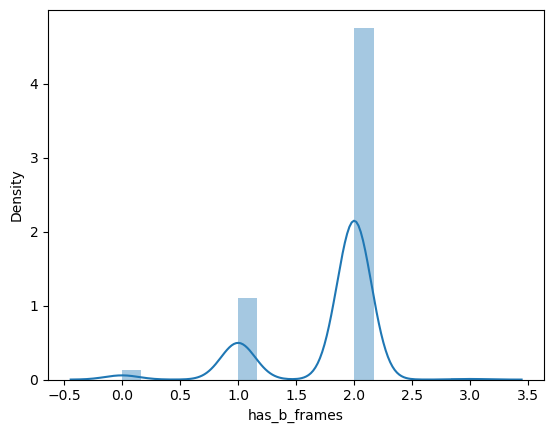

In [18]:
sns.distplot(tmp['has_b_frames'])
print("Skewness: %f" % tmp['has_b_frames'].skew())
print("Kurtosis: %f" % tmp['has_b_frames'].kurt())

Skewness: -0.450200
Kurtosis: -1.653519


/home/raz/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


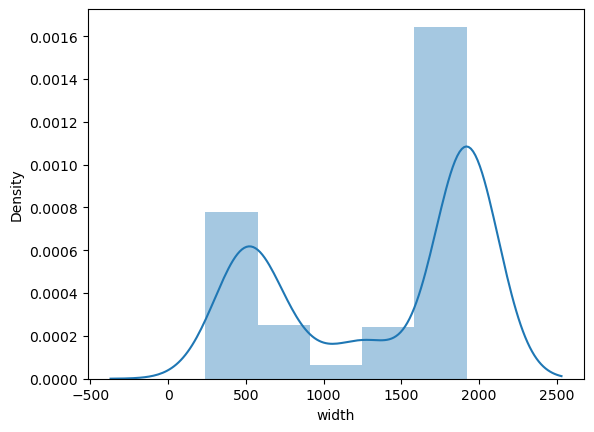

In [19]:
sns.distplot(tmp['width'])
print("Skewness: %f" % tmp['width'].skew())
print("Kurtosis: %f" % tmp['width'].kurt())

Skewness: -0.495927
Kurtosis: -1.560304


/home/raz/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


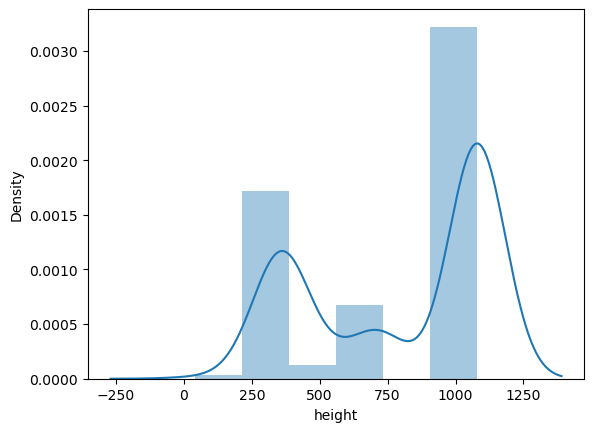

In [20]:
sns.distplot(tmp['height'])
print("Skewness: %f" % tmp['height'].skew())
print("Kurtosis: %f" % tmp['height'].kurt())

/home/raz/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.839607
Kurtosis: 2.915960


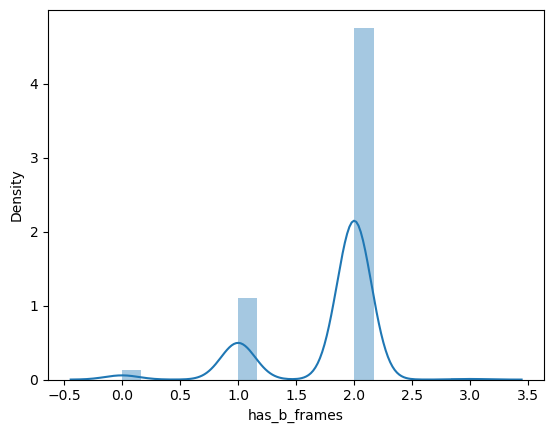

In [21]:
sns.distplot(tmp['has_b_frames'])
print("Skewness: %f" % tmp['has_b_frames'].skew())
print("Kurtosis: %f" % tmp['has_b_frames'].kurt())

## Memory Heat Map (MHM)
According to the article:
http://www.cs.yale.edu/homes/yoon-man-ki/DAC2015_MemoryHeatMap.pdf ,
The efficiency can be seen in the Memory Heat Map (MHM) to characterize the memory behavior of the operating system and to identify an anomaly in a real-time system.

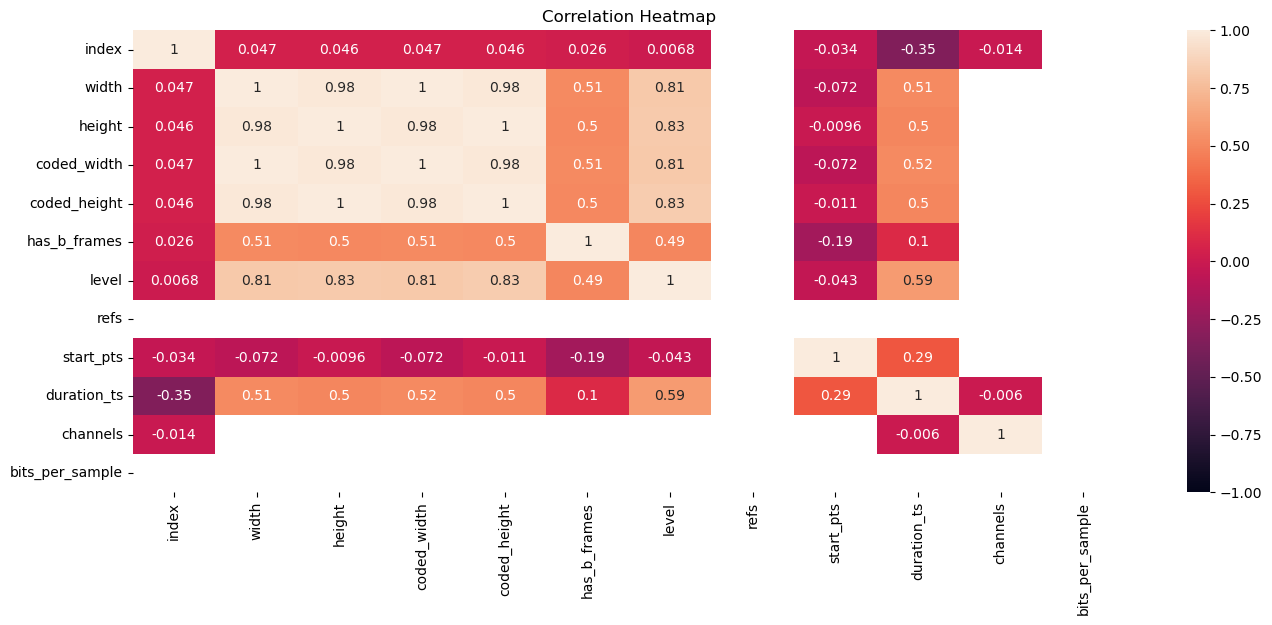

In [22]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(tmp.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

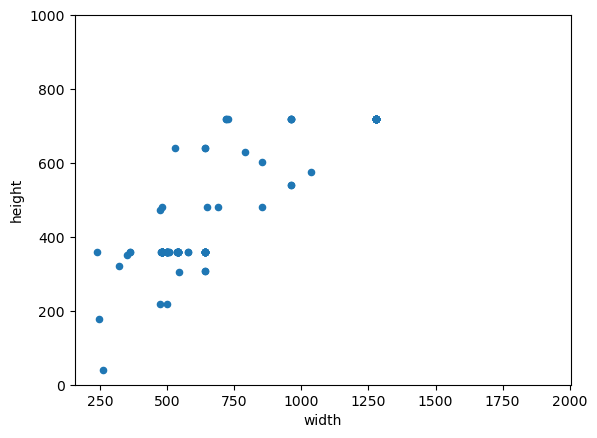

In [23]:
#scatter plot totalbsmtsf/saleprice
var = 'width'
data = pd.concat([tmp['height'], tmp[var]], axis=1)
data.plot.scatter(x=var, y='height', ylim=(0,1000));

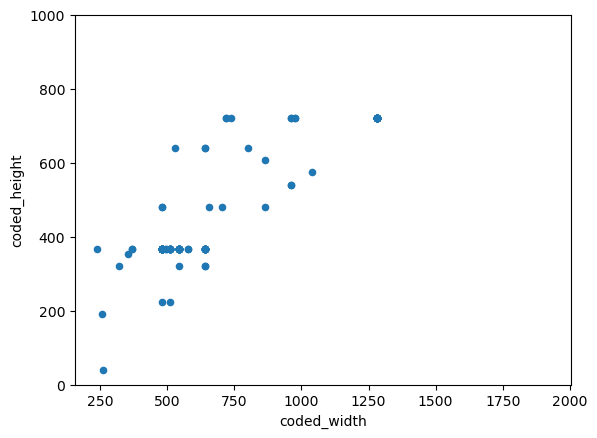

In [24]:
#scatter plot totalbsmtsf/saleprice
var = 'coded_width'        
data = pd.concat([tmp['coded_height'], tmp[var]], axis=1)
data.plot.scatter(x=var, y='coded_height', ylim=(0,1000));

# Data organization

our columns:

['index', 'codec_name', 'codec_long_name', 'profile', 'codec_type',
'codec_time_base', 'codec_tag_string', 'codec_tag', 'width', 'height',
'coded_width', 'coded_height', 'has_b_frames', 'pix_fmt', 'level', 'chroma_location', 
'refs', 'is_avc', 'nal_length_size', 'r_frame_rate', 'avg_frame_rate', 'time_base', 'start_pts',
'start_time', 'duration_ts', 'duration', 'bit_rate', 'bits_per_raw_sample', 'nb_frames', 
'channels',  'bits_per_sample', 'max_bit_rate', 'color_range', 'color_space', 
'color_transfer', 'color_primaries', 'quarter_sample', 'divx_packed''disposition', 'tags', 
'sample_aspect_ratio', 'display_aspect_ratio', 'sample_fmt', 'sample_rate', 'channel_layout']


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### 'codec_name'

At a fundamental level, you can specify the type of a media file using a simple MIME type, such as video/mp4 or audio/mpeg. However, many media types—especially those that support video tracks—can benefit from the ability to more precisely describe the format of the data within them. For instance, just describing a video in an MPEG-4 file with the MIME type video/mp4 doesn't say anything about what format the actual media within takes.

For that reason, the codecs parameter can be added to the MIME type describing media content. With it, container-specific information can be provided. This information may include things like the profile of the video codec, the type used for the audio tracks, and so forth.

In [26]:
print(tmp['codec_name'].unique())

['h264' 'aac' 'mp3' nan 'mpeg4' 'rawvideo']


In [27]:
tmp['tag_codec_name'] = le.fit_transform(tmp['codec_name'])

In [28]:
# print(tmp['tag_codec_name'])

### 'codec_long_name'

While most codecs are known by some abbreviation of the name, the Codec Long Name gives the full name of the codec in question. For example:

advanced audio coding (AAC)
pcm signed 16-bit little-endian
motion JPEG
and others.
If the Codec Long Name is present in a file, it automatically means that the file is encoded.

In [29]:
print(tmp['codec_long_name'].unique()) #this is same to 'codec_name' so we won't tag it

['H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10' 'AAC (Advanced Audio Coding)'
 'MP3 (MPEG audio layer 3)' nan 'MPEG-4 part 2' 'raw video']


In [30]:
tmp['tag_codec_name'] = le.fit_transform(tmp['codec_name'])

### 'profile'

The profile defines the subset of bit stream features in an H.264 stream, including color reproduction and additional video compression. It is. important that the selected profile is compatible with the recording device so that a stream can be decoded and viewed.

In [31]:
print(tmp['profile'].unique())

['High' 'Main' 'LC' nan 'HE-AAC' 'Constrained Baseline' 'HE-AACv2'
 'Simple Profile']


In [32]:
tmp['tag_profile'] = le.fit_transform(tmp['profile'])

In [33]:
print(tmp['tag_profile'])

0    3
0    3
0    5
1    4
0    3
    ..
0    3
1    7
0    3
0    3
0    3
Name: tag_profile, Length: 491, dtype: int64


### 'codec_type'

codec_type indicates the decoded stream type

In [34]:
print(tmp['codec_type'].unique())

['video' 'audio' 'data']


In [35]:
def categorize(row): 
    if  row['codec_type'] == 'data' :
        return 1
    else:
        return 0

tmp["tag_codec_type"] = tmp.apply(lambda row: categorize(row), axis=1)

In [36]:
print(tmp['tag_codec_type'])

0    0
0    0
0    0
1    0
0    0
    ..
0    0
1    0
0    0
0    0
0    0
Name: tag_codec_type, Length: 491, dtype: int64


### 'codec_time_base'

In [37]:
print(tmp['codec_time_base'].unique())

['1/50' '1001/60000' '1/44100' '1/60' '1/48000' '2069999/120060000'
 '3/173' '125089/6635520' '1/58' '500/16757' '3/100' '1/48' '125/7118' nan
 '1/20' '1713103/99360000' '1349999/78300000' '19853/1190000'
 '17753/888000' '269/17880' '27817/2949120' '1/96000' '50/2997'
 '2343103/135900000' '5539/332500' '3081/185000' '134651/2734080'
 '625/18694' '8081/312320' '18925/908842' '912161/43740000' '1/10' '1/147'
 '139259/4177920' '500/29901' '2519999/146160000' '1147/132720'
 '175507/7875000' '3013931/181440000']


In [38]:
tmp['tag_codec_time_base'] = le.fit_transform(tmp['codec_time_base'])

In [39]:
print(tmp['tag_codec_time_base'])

0     6
0     6
0    10
1     3
0     6
     ..
0     6
1     3
0     6
0     6
0     6
Name: tag_codec_time_base, Length: 491, dtype: int64


### 'codec_tag_string'
The Codec Tag is another way to represent the codec used to encode a media file such as a video or music file. Usually, there is more information available for the codec used in a media file. One of them is the Codec Tag. The value for the Codec Tag usually consists of a string of numbers.

In [40]:
print(tmp['codec_tag_string'].unique())

['avc1' 'mp4a' 'tmcd' 'xvid' 'U[0][0][0]' '[0][0][0][0]']


In [41]:
tmp['tag_codec_tag_string'] = le.fit_transform(tmp['codec_tag_string'])

In [42]:
print(tmp['tag_codec_tag_string'])

0    2
0    2
0    2
1    3
0    2
    ..
0    2
1    3
0    2
0    2
0    2
Name: tag_codec_tag_string, Length: 491, dtype: int64


### 'codec_tag'
The Codec Tag is another way to represent the codec used to encode a media file such as a video or music file. Usually, there is more information available for the codec used in a media file. One of them is the Codec Tag. The value for the Codec Tag usually consists of a string of numbers.

In [43]:
print(tmp['codec_tag'].unique()) #this is same to 'codec_tag_string' so we won't tag it

['0x31637661' '0x6134706d' '0x64636d74' '0x64697678' '0x0055' '0x0000']


### 'width' & 'height'

The width and height of videos are usually measured in pixels and are collectively termed as the "dimensions" of the video. Thus, if a video is 320 pixels wide and 240 pixels in height, it is said to have dimensions of 320 x 240 pixels.

In [44]:
print(tmp['width'].unique())

[1920.  640.   nan  480. 1280.  360.  500.  540.  508.  240.  790.  538.
  648.  478.  544.  960. 1036.  728.  962.  720. 1440.  474.  854.  320.
  350.  260.  482.  690.  248.  528.  576.]


In [45]:
print(tmp['height'].unique())

[1080.  360.   nan  720.  218.  630.  480.  306.  576.  308.  640.  540.
  602.  320.  350.   40.  474.  178. 1024.]


### 'coded_width' & 'coded_height'

The Coded Width that can be found in many files, is a subset of the general width of a file. Similar to the other subsets like the image width or cropped image width, the Coded Width specifies a specific width within the file.

In case of the Coded Width, it expressed the width of a video file, picture or photo, document or even parts of an audio file (e.g. the cover art) as it is coded within the file. This can and usually does differ from the original width of the file and is altered to fit within a certain standard or requirement.

Together, the Coded Width and the Coded Height form the coded dimension of the file.

In [46]:
print(tmp['coded_width'].unique())

[1920.  640.   nan  480. 1280.  368.  512.  544.  240.  800.  656.  960.
 1040.  736.  976.  720. 1440.  864.  320.  352.  260.  496.  704.  256.
  528.  576.]


In [47]:
print(tmp['coded_height'].unique())

[1088.  368.   nan  720.  224.  640.  480.  320.  576.  540.  608.  352.
   40.  192. 1024.]


### 'has_b_frames'

In many video files, a meta information called Has B Frames can be found. This has to do with the video compression and compression of the frames of a video. Different frame types can be used as the algorithm for this compression.

In [48]:
print(tmp['has_b_frames'].unique())

[ 2.  1. nan  0.  3.]


### 'pix_fmt'

pix_fmts shows all supported pixel formats

In [49]:
print(tmp['pix_fmt'].unique())

['yuv420p' nan 'yuvj420p' 'bgr24']


### 'level'

For broadcast encoding, it is defined in 8-bit color depth (values between 0 and 255) where black is level 16, and white is level 235. These are often referred to as “video levels”.

In [50]:
print(tmp['level'].unique())

[ 50.  30.  nan  21.  40.  31.  22.  12.  32.  42.   3. -99.  41.]


In [51]:
tmp['tag_level'] = le.fit_transform(tmp['level'])

In [52]:
print(tmp['tag_level'])

0    11
0    11
0     5
1    12
0    11
     ..
0     3
1    12
0     8
0    11
0    11
Name: tag_level, Length: 491, dtype: int64


### 'chroma_location'

chroma locations

  chromaloc	||| ffmpeg chroma_location
  
        0	left
        
        1	center
        
        2	topleft
        
        3	top
        
        4	bottomleft
        
        5	bottom

In [53]:
print(tmp['chroma_location'].unique())

['left' nan]


### 'refs'

In [54]:
print(tmp['refs'].unique())

[ 1. nan]


### 'is_avc'

Used to parse AVC variant of h264.

this flag is != 0 if codec is avc1

In [55]:
print(tmp['is_avc'].unique())

['true' nan]


### 'nal_length_size'

Number of bytes used for nal length (1, 2 or 4)

In [56]:
print(tmp['nal_length_size'].unique())

['4' nan]


In [57]:
tmp['tag_nal_length_size'] = le.fit_transform(tmp['nal_length_size'])

### 'r_frame_rate'

Specifies the number of frames to be displayed every second. For example, the function call frameRate(30) will attempt to refresh 30 times a second.

In [58]:
print(tmp['r_frame_rate'].unique())

['25/1' '30000/1001' '0/0' '30/1' '29/1' '173/6' '16757/1000' '50/3'
 '24/1' '3559/125' '10/1' '60/1' '60000/1001' '2997/100' '18694/625'
 '1199/50' '24000/1001' '15/1' '29901/1000' '59/1' '269/12']


In [59]:
tmp['tag_r_frame_rate'] = le.fit_transform(tmp['r_frame_rate'])

In [60]:
print(tmp['tag_r_frame_rate'])

0     9
0     9
0    15
1     0
0     9
     ..
0     9
1     0
0     9
0     9
0     9
Name: tag_r_frame_rate, Length: 491, dtype: int64


### 'time_base'

time_base. This is the fundamental unit of time (in seconds) in terms of which frame timestamps are represented.

In [61]:
print(tmp['time_base'].unique())

['1/90000' '1/44100' '1/12800' '1/15360' '1/48000' '1/11072' '1/16757'
 '1/14236' '1/30000' '1/12288' '1/19200' '1/96000' '1/11988' '625/18694'
 '32/1225' '1/600' '1/19184' '1/10240' '1/10' '3/125' '1/29901']


### 'start_pts' & 'start_time'

https://ffmpeg.org/ffmpeg-filters.html
#### pts
The PTS (Presentation TimeStamp) of the output audio frame, expressed in TB units.

#### start_time, st
Specify the timestamp (in seconds) of the frame to start to apply the fade effect. If both start_frame and start_time are specified, the fade will start at whichever comes last. Default is 0.

In [62]:
print(tmp['start_pts'].unique())

[   0  707 3690 1001 3407]


In [63]:
tmp['tag_start_pts'] = le.fit_transform(tmp['start_pts'])

In [64]:
print(tmp['tag_start_pts'])

0    0
0    0
0    0
1    0
0    0
    ..
0    0
1    0
0    0
0    0
0    0
Name: tag_start_pts, Length: 491, dtype: int64


In [65]:
print(tmp['start_time'].unique())

['0.000000' '0.046029' '0.041000' '0.033367' '0.113567']


In [66]:
def categorize(row): 
    print(row['start_time'])
    if  row['start_time'] == '0.000000' :
        return 0
    else:
        return 1

tmp["tag_start_time"] = tmp.apply(lambda row: categorize(row), axis=1)

0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0

In [67]:
print(tmp['tag_start_time'])

0    0
0    0
0    0
1    0
0    0
    ..
0    0
1    0
0    0
0    0
0    0
Name: tag_start_time, Length: 491, dtype: int64


### 'avg_frame_rate'

## Reading Videos using OpenCV-Frame rate
Frame rate is the measurement of how quickly a number of frames appears within a second, which is why it's also called FPS (frames per second).

In [68]:
!pip install opencv-python


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [69]:
import cv2

we want to check for the avg_frame_rate parameter of the desired video stream. If the value of this parameter is a fraction like this

"avg_frame_rate": "1205285219/50270287"
with a denominator that is not 1 then the video file *has* a variable frame rate.

If the value is like this

"avg_frame_rate": "25/1" 
with a denominator that is 1 then the video file  *has no* a variable frame rate.

we need to check if the stream has a constant frame rate.

https://superuser.com/questions/1487401/how-can-i-tell-if-a-video-has-a-variable-frame-rate

In [70]:
files = Path("/home/raz/Desktop/final/all").glob('*')
for file in files:
    head, tail =os.path.split(file)
    print("----------------------------------------------------------------------------------------")
    print(tail)
    info=ffmpeg.probe(file)
    print(f"duration={info['format']['duration']}")
    print(f"framerate={info['streams'][0]['avg_frame_rate']}")
    

----------------------------------------------------------------------------------------
A1606b0e6_0 (42).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (29).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
You Like Krabby Patties Don't You Squidward.mp4
duration=18.692056
framerate=30000/1001
----------------------------------------------------------------------------------------
B1606b0e6_1 (19).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (18).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (54).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
malware30.mp4


duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
malware20.mp4
duration=33.960000
framerate=25/1
----------------------------------------------------------------------------------------
malware33.mp4
duration=19.840000
framerate=25/1
----------------------------------------------------------------------------------------
test (7).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (60).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (6).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
test (16).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (11).mp4
duration=30.000000
fra

duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
On Time Percentage_ 100%.mp4
duration=19.040356
framerate=49680000/1713103
----------------------------------------------------------------------------------------
B1606b0e6_1 (59).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (66).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
Rev Up Those Fryers!.mp4
duration=6.617678
framerate=30000/1001
----------------------------------------------------------------------------------------
malware38.mp4
duration=19.320000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (40).mp4
duration=30.000000
framerate=25/1
--------------------------------------------------------------------------------

duration=26.052789
framerate=67950000/2343103
----------------------------------------------------------------------------------------
Mr Krabs choking on an apple.mp4
duration=18.320533
framerate=25/1
----------------------------------------------------------------------------------------
E Minor.mp4
duration=13.328244
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (7).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
malware42.mp4
duration=14.240000
framerate=25/1
----------------------------------------------------------------------------------------
You may win this time.mp4
duration=19.620856
framerate=30000/1001
----------------------------------------------------------------------------------------
B1606b0e6_1 (6).mp4
duration=30.000000
framerate=25/1
-------------------------------------------------------------------------------------

duration=35.240000
framerate=25/1
----------------------------------------------------------------------------------------
Bubble Bass' Order.mp4
duration=17.089867
framerate=30000/1001
----------------------------------------------------------------------------------------
A1606b0e6_0 (31).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (74).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
I'm a quitter!!!.mp4
duration=18.274100
framerate=30000/1001
----------------------------------------------------------------------------------------
B1606b0e6_1 (25).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
I Hate The Pill.mp4
duration=11.888611
framerate=30/1
----------------------------------------------------------------------------------------


duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
malware45.mp4
duration=18.800000
framerate=25/1
----------------------------------------------------------------------------------------
malware40.mp4
duration=20.480000
framerate=25/1
----------------------------------------------------------------------------------------
Ever alert.mp4
duration=16.602267
framerate=30000/1001
----------------------------------------------------------------------------------------
A1606b0e6_0 (75).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (50).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
test (4).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (28).mp4
duration=30.00

In [71]:
def categorize(row): 
    rate=str(row['avg_frame_rate'])
    rate=rate.split('/')
    if  rate[-1] == "1" :
        return 0
    else:
        return 1

tmp["tag_frame_rate"] = tmp.apply(lambda row: categorize(row), axis=1)

In [72]:
print(tmp["tag_frame_rate"].unique())

[0 1]


### 'duration'

duration, d
The number of seconds for which the fade effect has to last. At the end of the fade-in effect the output video will have the same intensity as the input video, at the end of the fade-out transition the output video will be filled with the selected color. If both duration and nb_frames are specified, duration is used. Default is 0 (nb_frames is used by default).

In [73]:
print(tmp['duration'].unique())

['30.000000' '29.960000' '18.685333' '18.692063' '13.320000' '13.375011'
 '25.051995' '22.400000' '18.757007' '19.360000' '16.197007' '1.733333'
 '1.856000' '22.999989' '23.010975' '8.233333' '8.266304' '32.480000'
 '28.056009' '16.766667' '16.788027' '1.283237' '9.142467' '9.148662'
 '8.143815' '6.176508' '48.880000' '40.803991' '20.120000' '16.822993'
 '10.160000' '10.631995' '30.000181' '30.912454' '30.928980' '13.700000'
 '13.722993' '12.212200' '12.213696' '23.800000' '19.906009' '10.240000'
 '8.595011' '1.200000' '7.233333' '7.383946' '33.960000' '28.396009'
 '19.840000' '16.613991' '0.033333' '10.583333' '10.588299' '4.074178'
 '4.132993' '22.080000' '19.096009' '10.076733' '10.077460' '29.396033'
 '29.396463' '6.406400' '6.408707' '1.533333' '1.536000' '16.625000'
 '16.625488' '7.920000' '6.661995' '25.900000' '25.913469' '13.560000'
 '11.363991' '33.480000' '27.951995' '10.360000' '25.966009' '40.774067'
 '40.774240' '21.880000' '18.311995' '26.893533' '26.911927' '20.933333'


In [74]:
def categorize(row): 
    if  float(row['duration']) < 5.0 :
        return 0
    elif float(row['duration']) < 10.0:
        return 1
    elif float(row['duration']) < 20.0:
        return 2
    else:
        return 3

tmp["tag_duration"] = tmp.apply(lambda row: categorize(row), axis=1)

In [75]:
# print( tmp['tag_duration'].iloc[100:150])
print( tmp['tag_duration'])

0    3
0    3
0    2
1    2
0    3
    ..
0    3
1    3
0    3
0    3
0    3
Name: tag_duration, Length: 491, dtype: int64


In [76]:
tmp.shape

(491, 57)

### 'bit_rate'

Video bitrate is essentially any video data that is being transferred at any given moment.


What happens if my bitrate is too high? High bitrate means higher quality video, but it also means your video file will be much larger. The larger the file, the more likely it is that your viewers may experience buffering issues.

In [77]:
# print(tmp['bit_rate'].unique())

In [78]:
sort1=(tmp['bit_rate'].tolist())
sort2= [int(i) for i in sort1]
print(sorted(sort2))

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 11703, 15303, 17051, 30720, 31457, 32256, 32998, 40690, 61739, 64000, 64503, 72746, 77032, 84244, 84244, 93636, 94862, 106709, 107904, 116050, 124621, 125573, 125573, 125587, 125587, 125587, 125587, 125587, 125588, 125588, 125598, 125617, 125628, 125631, 125674, 125679, 125682, 125682, 125686, 125687, 125690, 125697, 125704, 125712, 125721, 125725, 125727, 125730, 125730, 125733, 125734, 125735, 125762, 125763, 125764, 125782, 125784, 125795, 125799, 125801, 125815, 125817, 125818, 125846, 125976, 126069, 126115, 126220, 126240, 127997, 127998, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 127999, 1279

In [79]:
def Average(lst):
    return sum(lst) / len(lst)

In [80]:
def categorize(row): 
    if  float(row['bit_rate']) < avg :
        return 1
    else:
        return 0
avg=Average(sort2)
tmp["tag_bit_rate"] = tmp.apply(lambda row: categorize(row), axis=1)

In [81]:
print( tmp['tag_bit_rate'])

0    0
0    0
0    1
1    1
0    0
    ..
0    1
1    1
0    0
0    0
0    0
Name: tag_bit_rate, Length: 491, dtype: int64


### 'bits_per_raw_sample'
https://datatracker.ietf.org/doc/html/draft-ietf-cellar-ffv1-v4-19#name-bits_per_raw_sample

bits_per_raw_sample indicates the number of bits for each Sample. Inferred to be 8 if not present

In [82]:
print(tmp['bits_per_raw_sample'].unique())

['8' nan]


### 'nb_frames'

nb_frames, n
The number of frames that the fade effect lasts. At the end of the fade-in effect, the output video will have the same intensity as the input video. At the end of the fade-out transition, the output video will be filled with the selected color. Default is 25.

In [83]:
print(tmp['nb_frames'].unique())

['750' '749' '560' '805' '333' '513' '960' '719' '484' '621' '52' '88'
 '667' '991' '247' '356' '812' '1075' '503' '723' '37' '274' '394' '216'
 '266' '1222' '1563' '645' '254' '408' '870' '1292' '518' '1332' '411'
 '591' '366' '526' '595' '763' '256' '330' '20' '217' '159' '849' '1088'
 '496' '637' '1' '456' '116' '179' '552' '732' '302' '434' '881' '1266'
 '192' '276' '46' '72' '399' '716' '198' '259' '1116' '339' '436' '837'
 '1071' '995' '1756' '547' '702' '806' '1159' '628' '902' '248' '497'
 '638' '820' '285' '483' '619' '1220' '243' '392' '435' '646' '855' '555'
 '712' '446' '573' '641' '444' '765' '1401' '554' '298' '887' '384' '368'
 '724' '2716' '818' '1047' '175' '389' '443' '1202' '470' '588' '754'
 '755' '1122' '458' '789' '574' '459' '845' '665' '955' '1151' '713' '797'
 '640' '82' '130' '180' '214' '563' '487' '62' '80' '695' '89' '413' '334'
 '429' '61' '48' '307' '551' '758' '1361' '852' '268' '387' '10' '1175'
 '445' '683' '1128' '512' '736' '787' '210' '3784' '6793' 

### 'channels'


In [84]:
print(tmp['channels'].unique())

[nan  2.  1.]


### 'bits_per_sample'

bits_per_sample (int) – The number of bits per sample. This is 0 for lossy formats, or when it cannot be accurately inferred.

In [85]:
print(tmp['bits_per_sample'].unique())

[nan  0.]


### 'max_bit_rate'


Bitrate is the amount of data encoded for a unit of time, and for streaming is usually referenced in megabits per second (Mbps) for video, and in kilobits per second (kbps) for audio. From a streaming perspective, a higher video bitrate means a higher quality video that requires more bandwidth.

In [86]:
print(tmp['max_bit_rate'].unique())

[nan '128000' '64000' '127999' '30721' '197598' '94850' '32256' '65259'
 '1000000' '242625' '64503' '196389' '61743' '36784' '256000' '129505'
 '192000' '195869' '32000' '128435']


### 'color_range'


Color Range is a selection tool that allows you to select parts of an image based on its color. This makes it easy to select one a specific color and then change its hue, saturation and/or brightness.

In [87]:
print(tmp['color_range'].unique())

[nan 'tv' 'pc']


### 'color_space'

A color space is a range of colors on a spectrum that can be interpreted and displayed on a visual plane. Many of these displays are interpreted through a RGB (Red, Green, Blue) chromaticity diagram, then processed and displayed on digital/analog images

In [88]:
print(tmp['color_space'].unique())

[nan 'bt709' 'smpte170m' 'bt470bg']


### 'color_transfer'


Color transfer, a widely used technique in digital image processing, refers to transferring the color distribution of a source image to another target image, so that the edited target image can have a color distribution similar to the source image.

In [89]:
print(tmp['color_transfer'].unique())

[nan 'bt709' 'smpte170m']


### 'color_primaries'


Color Primaries. An index into a table specifying the CIE 1931 xy chromaticity coordinates of the white point and the red, green, and blue primaries. The table of primaries specifies the white point and the red, green, and blue primary color points for a video system.

In [90]:
print(tmp['color_primaries'].unique())

[nan 'bt709' 'bt470bg' 'smpte170m']


### 'quarter_sample'



In [91]:
print(tmp['quarter_sample'].unique())

[nan 'false']


### 'divx_packed'


In [92]:
print(tmp['divx_packed'].unique())

[nan 'false']


### 'disposition'

-dispositions
Show stream dispositions.

Sets the disposition for a stream.

By default, the disposition is copied from the input stream, unless the output stream this option applies to is fed by a complex filtergraph - in that case the disposition is unset by default.

value is a sequence of items separated by ’+’ or ’-’. The first item may also be prefixed with ’+’ or ’-’, in which case this option modifies the default value. Otherwise (the first item is not prefixed) this options overrides the default value. A ’+’ prefix adds the given disposition, ’-’ removes it. It is also possible to clear the disposition by setting it to 0.

If no -disposition options were specified for an output file, ffmpeg will automatically set the ’default’ disposition on the first stream of each type, when there are multiple streams of this type in the output file and no stream of that type is already marked as default.

The -dispositions option lists the known dispositions.


In [93]:
print(tmp['disposition'])

0    {'default': 1, 'dub': 0, 'original': 0, 'comme...
0    {'default': 1, 'dub': 0, 'original': 0, 'comme...
0    {'default': 1, 'dub': 0, 'original': 0, 'comme...
1    {'default': 1, 'dub': 0, 'original': 0, 'comme...
0    {'default': 1, 'dub': 0, 'original': 0, 'comme...
                           ...                        
0    {'default': 1, 'dub': 0, 'original': 0, 'comme...
1    {'default': 1, 'dub': 0, 'original': 0, 'comme...
0    {'default': 1, 'dub': 0, 'original': 0, 'comme...
0    {'default': 1, 'dub': 0, 'original': 0, 'comme...
0    {'default': 1, 'dub': 0, 'original': 0, 'comme...
Name: disposition, Length: 491, dtype: object


### 'tags'

Tags are descriptive keywords you can add to your video to help viewers find your content. Your video's title, thumbnail, and description are more important pieces of metadata for your video's discovery. These main pieces of info help viewers decide which videos to watch.

In [94]:
print(tmp['tags'].tolist())

[{'language': 'eng'}, {'language': 'eng'}, {'creation_time': '2017-10-20T16:17:18.000000Z', 'language': 'und', 'handler_name': 'ISO Media file produced by Google Inc. Created on: 10/20/2017.'}, {'creation_time': '2017-10-20T16:17:18.000000Z', 'language': 'und', 'handler_name': 'ISO Media file produced by Google Inc. Created on: 10/20/2017.'}, {'language': 'eng'}, {'language': 'eng'}, {'language': 'eng'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'SoundHandler'}, {'language': 'eng'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'SoundHandler'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'SoundHandler'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'SoundHandler'}, {'language': 'und', 'handler_name': 'ISO Media file produced by Google Inc.'}, {'language': 'u

### 'sample_aspect_ratio'


An aspect ratio describes the width and height of a screen or image. An aspect ratio consists of two numbers separated by a colon, the first number denoting the image's width and the second its height. For example, an aspect ratio of 1.33:1 means the image's width is 1.33 times the size of its height.

In [95]:
print(tmp['sample_aspect_ratio'].unique())

[nan '1:1' '8546:8521' '1444:1443' '4:3']


### 'display_aspect_ratio'


The aspect ratio of a display device is the proportional relationship between the width and the height of the display. It is expressed as two numbers separated by a colon (x:y), where x corresponds to the width and y to the height. Common aspect ratios for displays, past and present, include 5:4, 4:3, 16:10 and 16:9.

In [96]:
print(tmp['display_aspect_ratio'].unique())

[nan '16:9' '1:1' '4:3' '25:18' '2:3' '1048317:699424' '127:90' '27:20'
 '3:2' '239:180' '259:144' '269:180' '160:77' '361:270' '237:109'
 '427:240' '241:180' '23:16' '124:89' '33:40' '8:5' '9:16']


In [97]:
print(tmp['display_aspect_ratio'])

0     NaN
0     NaN
0    16:9
1     NaN
0     NaN
     ... 
0     NaN
1     NaN
0     NaN
0     NaN
0     NaN
Name: display_aspect_ratio, Length: 491, dtype: object


In [98]:
tmp['tag_display_aspect_ratio'] = le.fit_transform(tmp['display_aspect_ratio'])

 'sample_fmt', 'sample_rate', 'channel_layout']


### 'sample_fmt'

sample_fmt
The sample format of the incoming audio buffers. Either a sample format name or its corresponding integer representation from the enum AVSampleFormat in libavutil/samplefmt.h

In [99]:
print(tmp['sample_fmt'].unique())

[nan 'fltp']


### 'sample_rate'


Definition: Sampling rate or sampling frequency defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal.

In [100]:
print(tmp['sample_rate'].unique())

[nan '44100' '48000' '96000' '147']


### 'channel_layout'

channel_layout, c
Set output channel layout. If not specified, the channel layout is specified by the number of expressions. If set to ‘same’, it will use by default the same input channel layout. The default is "stereo".

In [101]:
print(tmp['channel_layout'].unique())

[nan 'stereo' 'mono']


##  Training Data

In [102]:
# files = Path("/home/raz/Desktop/final/mal").glob('*')
# train = []

# sum1 =0
# for fvids in files:
#     print(str(fvids).split('\\')[-1])
#     cap= cv2.VideoCapture(str(fvids))
#     i=0
#     while(cap.isOpened()):
#         ret, frame = cap.read()
#         if ret == False:
#             break
#         i+=1
#         train.append(frame)
#     sum1 +=i
#     print("Number Of Frames: ",i)
#     cap.release()
    
# print("Total Frames in Forked Directory: ",sum1)

In [103]:
# # # Setting features for further feature extraction by choosing columns
# # # Some will be "simply" encoded via label encoding and others with HashingVectorizer
# from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, classification_report
# from collections import Counter
# SIMPLE_HEADERS = ['index', 'codec_name', 'codec_long_name', 'profile', 'codec_type',
#                   'codec_time_base', 'codec_tag_string', 'codec_tag', 'width', 'height',
#                   'coded_width', 'coded_height', 'has_b_frames', 'pix_fmt', 'level', 'chroma_location', 
#                   'refs', 'is_avc', 'nal_length_size', 'r_frame_rate', 'avg_frame_rate', 'time_base', 'start_pts',
#                   'start_time', 'duration_ts', 'duration', 'bit_rate', 'bits_per_raw_sample', 'nb_frames', 
#                   'channels',  'bits_per_sample', ]

# # On these headers we will run HashingVectorizer
# COMPLEX_HEADERS = ['max_bit_rate', 'color_range', 'color_space', 
#                   'color_transfer', 'color_primaries', 'quarter_sample', 'divx_packed''disposition', 'tags', 'sample_aspect_ratio', 'display_aspect_ratio', 'sample_fmt', 'sample_rate', 'channel_layout',]

# COLUMNS_TO_REMOVE = []

# # This is our main preprocessing function that will iterate over all of the chosen 
# # columns and run some feature extraction models
# def vectorize_df(tmp):
#     le = LabelEncoder()
#     h_vec = HashingVectorizer(n_features=4)

#     # Run LabelEncoder on the chosen features
#     for column in SIMPLE_HEADERS:
#         if type(column) != np.nan :
#             tmp[column] = le.fit_transform(tmp[column])
    
#     # Run HashingVectorizer on the chosen features
#     for column in COMPLEX_HEADERS: 
#         if type(column) != np.nan :
#             newHVec = h_vec.fit_transform(tmp[column])
#             tmp[column] = newHVec.todense()

#     # Remove some columns that may be needed.. (Or not, you decide)
#     for column in COLUMNS_TO_REMOVE: 
#         tmp.drop(column, axis=1, inplace=True)
#     return tmp



# tmp = vectorize_df(tmp)
# tmp.head()

In [104]:
tmp

,index,codec_name,codec_long_name,profile,codec_type,codec_time_base,codec_tag_string,codec_tag,width,height,...,tag_codec_tag_string,tag_level,tag_nal_length_size,tag_r_frame_rate,tag_start_pts,tag_start_time,tag_frame_rate,tag_duration,tag_bit_rate,tag_display_aspect_ratio
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,11,0,9,0,0,0,3,0,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,11,0,9,0,0,0,3,0,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,Main,video,1001/60000,avc1,0x31637661,640.0,360.0,...,2,5,0,15,0,0,1,2,1,4
1,1,aac,AAC (Advanced Audio Coding),LC,audio,1/44100,mp4a,0x6134706d,NaN,NaN,...,3,12,1,0,0,0,1,2,1,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,11,0,9,0,0,0,3,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,480.0,360.0,...,2,3,0,9,0,0,0,3,1,22
1,1,mp3,MP3 (MPEG audio layer 3),NaN,audio,1/44100,mp4a,0x6134706d,NaN,NaN,...,3,12,1,0,0,0,1,3,1,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,8,0,9,0,0,0,3,0,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,11,0,9,0,0,0,3,0,22


In [106]:
tmp.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 0
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     491 non-null    int64  
 1   codec_name                480 non-null    object 
 2   codec_long_name           480 non-null    object 
 3   profile                   423 non-null    object 
 4   codec_type                491 non-null    object 
 5   codec_time_base           480 non-null    object 
 6   codec_tag_string          491 non-null    object 
 7   codec_tag                 491 non-null    object 
 8   width                     333 non-null    float64
 9   height                    333 non-null    float64
 10  coded_width               333 non-null    float64
 11  coded_height              333 non-null    float64
 12  has_b_frames              333 non-null    float64
 13  pix_fmt                   333 non-null    object 
 14  level       

In [107]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = tmp.columns.to_list()
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
tmp.dtypes

['index', 'codec_name', 'codec_long_name', 'profile', 'codec_type', 'codec_time_base', 'codec_tag_string', 'codec_tag', 'width', 'height', 'coded_width', 'coded_height', 'has_b_frames', 'pix_fmt', 'level', 'chroma_location', 'refs', 'is_avc', 'nal_length_size', 'r_frame_rate', 'avg_frame_rate', 'time_base', 'start_pts', 'start_time', 'duration_ts', 'duration', 'bit_rate', 'bits_per_raw_sample', 'nb_frames', 'disposition', 'tags', 'sample_aspect_ratio', 'display_aspect_ratio', 'sample_fmt', 'sample_rate', 'channels', 'channel_layout', 'bits_per_sample', 'max_bit_rate', 'color_range', 'color_space', 'color_transfer', 'color_primaries', 'quarter_sample', 'divx_packed', 'tag_codec_name', 'tag_profile', 'tag_codec_type', 'tag_codec_time_base', 'tag_codec_tag_string', 'tag_level', 'tag_nal_length_size', 'tag_r_frame_rate', 'tag_start_pts', 'tag_start_time', 'tag_frame_rate', 'tag_duration', 'tag_bit_rate', 'tag_display_aspect_ratio']


index                         int64
codec_name                   object
codec_long_name              object
profile                      object
codec_type                   object
codec_time_base              object
codec_tag_string             object
codec_tag                    object
width                       float64
height                      float64
coded_width                 float64
coded_height                float64
has_b_frames                float64
pix_fmt                      object
level                       float64
chroma_location              object
refs                        float64
is_avc                       object
nal_length_size              object
r_frame_rate                 object
avg_frame_rate               object
time_base                    object
start_pts                     int64
start_time                   object
duration_ts                 float64
duration                     object
bit_rate                     object
bits_per_raw_sample         

In [109]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in tmp.columns[tmp.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    tmp[column] = tmp[column].fillna('None')
    
# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

tmp

,index,codec_name,codec_long_name,profile,codec_type,codec_time_base,codec_tag_string,codec_tag,width,height,...,tag_codec_tag_string,tag_level,tag_nal_length_size,tag_r_frame_rate,tag_start_pts,tag_start_time,tag_frame_rate,tag_duration,tag_bit_rate,tag_display_aspect_ratio
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,11,0,9,0,0,0,3,0,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,11,0,9,0,0,0,3,0,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,Main,video,1001/60000,avc1,0x31637661,640.0,360.0,...,2,5,0,15,0,0,1,2,1,4
1,1,aac,AAC (Advanced Audio Coding),LC,audio,1/44100,mp4a,0x6134706d,None,None,...,3,12,1,0,0,0,1,2,1,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,11,0,9,0,0,0,3,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,480.0,360.0,...,2,3,0,9,0,0,0,3,1,22
1,1,mp3,MP3 (MPEG audio layer 3),None,audio,1/44100,mp4a,0x6134706d,None,None,...,3,12,1,0,0,0,1,3,1,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,8,0,9,0,0,0,3,0,22
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,2,11,0,9,0,0,0,3,0,22


In [141]:
tmp["mal"]=real["mal"]

# Train test split

In [143]:
features_list = tmp.columns.to_list()
features_list.remove('mal')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
tmp.dtypes

['index', 'codec_name', 'codec_long_name', 'profile', 'codec_type', 'codec_time_base', 'codec_tag_string', 'codec_tag', 'width', 'height', 'coded_width', 'coded_height', 'has_b_frames', 'pix_fmt', 'level', 'chroma_location', 'refs', 'is_avc', 'nal_length_size', 'r_frame_rate', 'avg_frame_rate', 'time_base', 'start_pts', 'start_time', 'duration_ts', 'duration', 'bit_rate', 'bits_per_raw_sample', 'nb_frames', 'disposition', 'tags', 'sample_aspect_ratio', 'display_aspect_ratio', 'sample_fmt', 'sample_rate', 'channels', 'channel_layout', 'bits_per_sample', 'max_bit_rate', 'color_range', 'color_space', 'color_transfer', 'color_primaries', 'quarter_sample', 'divx_packed', 'tag_codec_name', 'tag_profile', 'tag_codec_type', 'tag_codec_time_base', 'tag_codec_tag_string', 'tag_level', 'tag_nal_length_size', 'tag_r_frame_rate', 'tag_start_pts', 'tag_start_time', 'tag_frame_rate', 'tag_duration', 'tag_bit_rate', 'tag_display_aspect_ratio']


index                        int64
codec_name                  object
codec_long_name             object
profile                     object
codec_type                  object
codec_time_base             object
codec_tag_string            object
codec_tag                   object
width                       object
height                      object
coded_width                 object
coded_height                object
has_b_frames                object
pix_fmt                     object
level                       object
chroma_location             object
refs                        object
is_avc                      object
nal_length_size             object
r_frame_rate                object
avg_frame_rate              object
time_base                   object
start_pts                    int64
start_time                  object
duration_ts                 object
duration                    object
bit_rate                    object
bits_per_raw_sample         object
nb_frames           

In [176]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing


features_list=features_list[-14:]
# We convert the feature list to a numpy array, this is required for the model fitting
X = tmp[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(tmp["mal"])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(404, 14) (404,)
(87, 14) (87,)


Counter({'benign': 285, 'malware': 206})

# Result printout

In [152]:
def ResultPrintout(model):
    # We print our results
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    model_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(model_matrix, annot=True, cmap='Blues', fmt='g', 
                          xticklabels=np.unique(true_labels), 
                          yticklabels=np.unique(true_labels)) 

    # The heatmap is cool but this is the most important result
    print(model_report)

# Model choosing and fitting

## RandomForestClassifier()

In [151]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=150)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('benign', 235), ('malware', 169)]


              precision    recall  f1-score   support

      benign    0.96000   0.96000   0.96000        50
     malware    0.94595   0.94595   0.94595        37

    accuracy                        0.95402        87
   macro avg    0.95297   0.95297   0.95297        87
weighted avg    0.95402   0.95402   0.95402        87



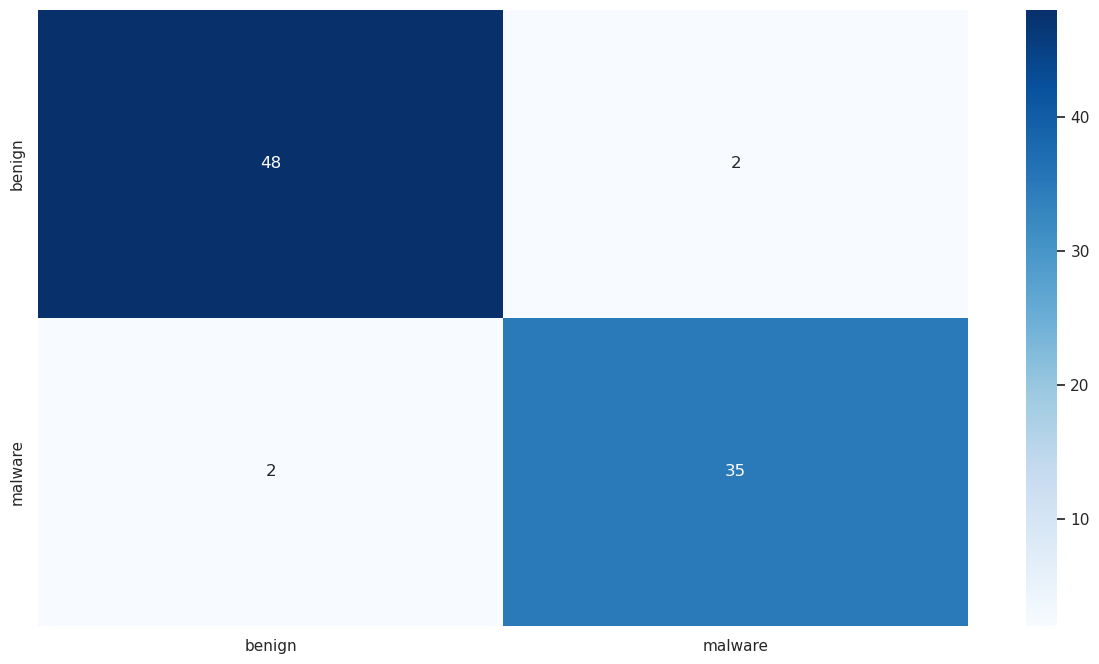

In [155]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

## plot feature importance

Feature: 0, Score: 0.08278
Feature: 1, Score: 0.16578
Feature: 2, Score: 0.00139
Feature: 3, Score: 0.08146
Feature: 4, Score: 0.01113
Feature: 5, Score: 0.13616
Feature: 6, Score: 0.01388
Feature: 7, Score: 0.08058
Feature: 8, Score: 0.00203
Feature: 9, Score: 0.00293
Feature: 10, Score: 0.01714
Feature: 11, Score: 0.15480
Feature: 12, Score: 0.17725
Feature: 13, Score: 0.07270


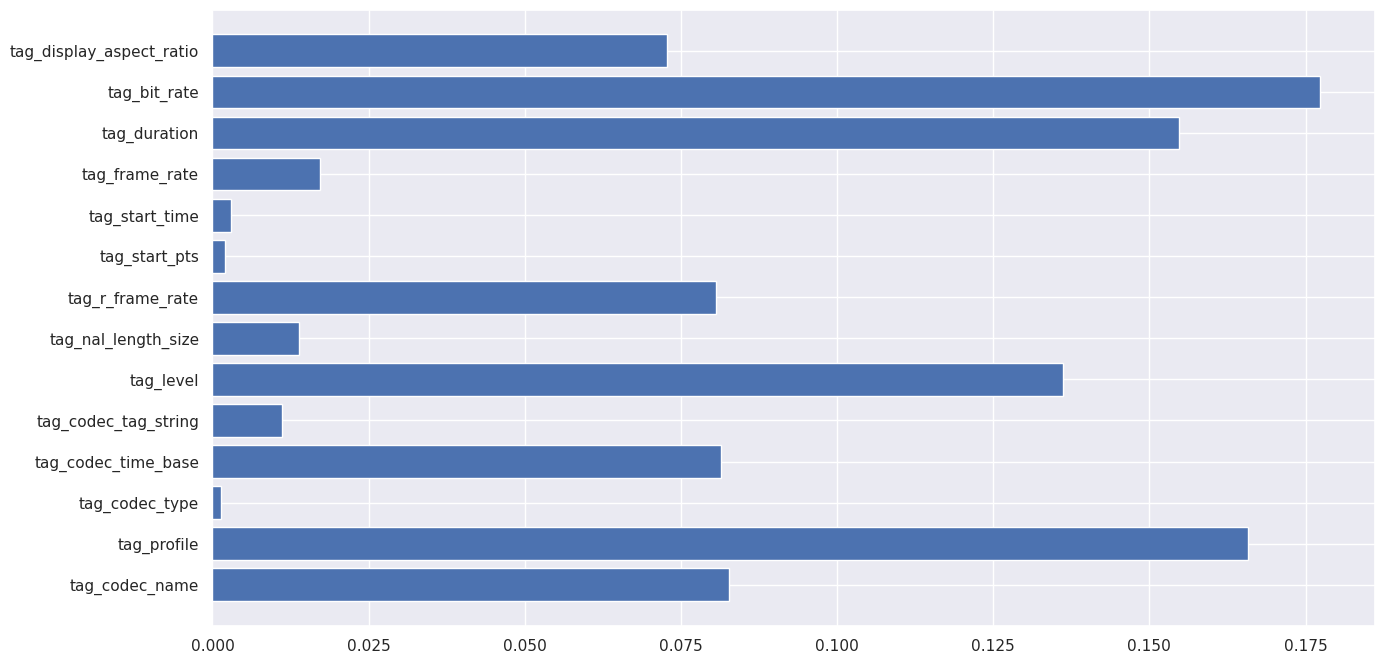

In [158]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), clf.feature_importances_, align="center")
pyplot.show()

## GradientBoostingClassifier()

[('benign', 235), ('malware', 169)]
              precision    recall  f1-score   support

      benign    0.96000   0.96000   0.96000        50
     malware    0.94595   0.94595   0.94595        37

    accuracy                        0.95402        87
   macro avg    0.95297   0.95297   0.95297        87
weighted avg    0.95402   0.95402   0.95402        87



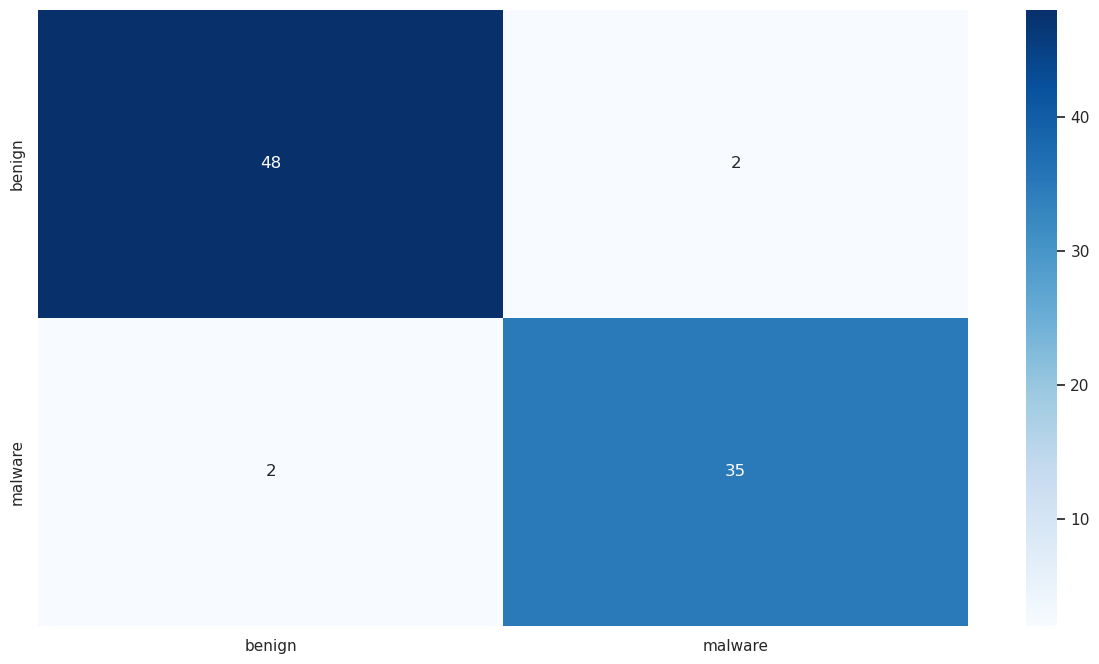

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_Boosting =  GradientBoostingClassifier(random_state=0)
# We choose our model of choice and set it's hyper parameters you can change anything
Gradient_Boosting.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))
ResultPrintout(Gradient_Boosting)

# plot feature importance

Feature: 0, Score: 0.10999
Feature: 1, Score: 0.17430
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.05713
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.04716
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05419
Feature: 8, Score: 0.00452
Feature: 9, Score: 0.00273
Feature: 10, Score: 0.00021
Feature: 11, Score: 0.13798
Feature: 12, Score: 0.31498
Feature: 13, Score: 0.09676


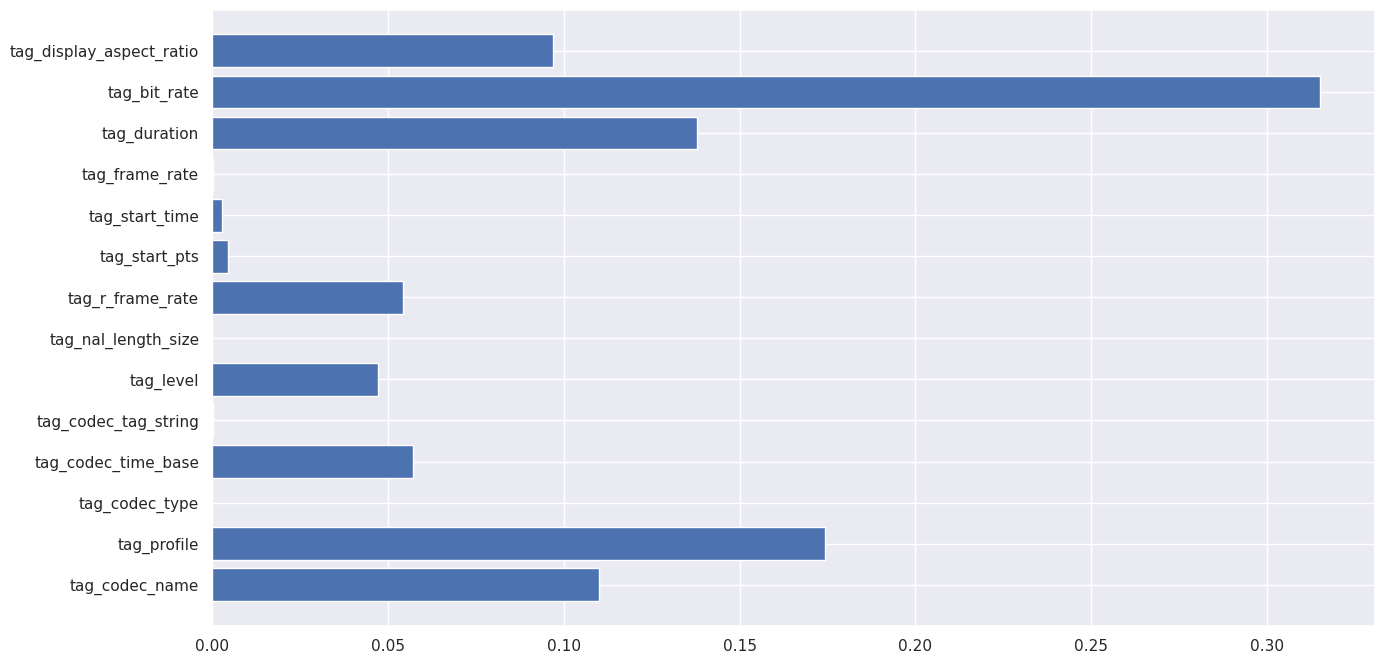

In [164]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from matplotlib import pyplot

# get importance
importance = Gradient_Boosting.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), Gradient_Boosting.feature_importances_, align="center")
pyplot.show()

# Testing more algorithms

SGDClassifier(class_weight='balanced', random_state=42)
              precision    recall  f1-score   support

      benign    0.88679   0.94000   0.91262        50
     malware    0.91176   0.83784   0.87324        37

    accuracy                        0.89655        87
   macro avg    0.89928   0.88892   0.89293        87
weighted avg    0.89741   0.89655   0.89587        87

DecisionTreeClassifier(class_weight='balanced', random_state=42)
              precision    recall  f1-score   support

      benign    1.00000   0.94000   0.96907        50
     malware    0.92500   1.00000   0.96104        37

    accuracy                        0.96552        87
   macro avg    0.96250   0.97000   0.96506        87
weighted avg    0.96810   0.96552   0.96566        87

SVC(class_weight='balanced', random_state=42)
              precision    recall  f1-score   support

      benign    0.91176   0.62000   0.73810        50
     malware    0.64151   0.91892   0.75556        37

    accuracy   

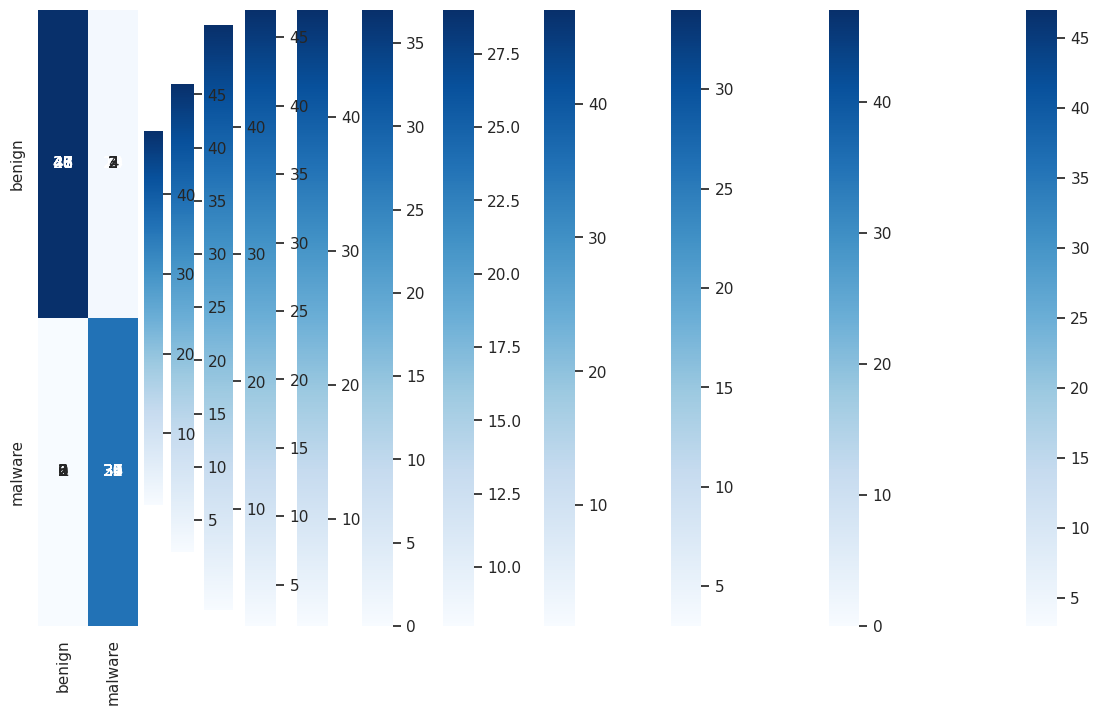

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit
import xgboost 
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline


Logistic_Regression =  LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

Decision_Tree =DecisionTreeClassifier(random_state=42, class_weight='balanced')

Random_Forest =  RandomForestClassifier(random_state=42, class_weight='balanced')

Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')

Gradient_Boosting =  GradientBoostingClassifier(random_state=42)

Hist_Gradient_Boosting =  HistGradientBoostingClassifier(random_state=42)

AdaBoost = AdaBoostClassifier(random_state=42)

SGD = SGDClassifier(random_state=42, class_weight='balanced')

SVC =SVC(class_weight='balanced', random_state=42)

Nearest_Neighbor = KNeighborsClassifier(100)

Perceptron = Perceptron(random_state=42)
# xg=xgboost.sklearn.XGBClassifier()
# xgb=xgboost.sklearn.XGBClassifier(max_depth=2)

models={Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost,SGD,SVC,Nearest_Neighbor,Perceptron}

for model in models:
    print(model)
    # Train Model
    model.fit(X_train, y_train)
    
    ResultPrintout(model)

## Choosing the best algorithm

In [179]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
best=0
m=None
# ,gbc
models={clf,rfc,Gradient_Boosting,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost,SGD,SVC,Nearest_Neighbor,Perceptron}

for i in models:
    print(i)
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = i.predict(X_test)
    true_labels = y_test
    print(accuracy_score(true_labels, predictions)*100)
    if accuracy_score(true_labels, predictions)*100 > best:
        best=accuracy_score(true_labels, predictions)*100
        m=i
#         print(best)
#         print(m)
        
print("-------")
print(best)
print(m)

SGDClassifier(class_weight='balanced', random_state=42)
89.65517241379311
RandomForestClassifier(n_estimators=350)
94.25287356321839
DecisionTreeClassifier(class_weight='balanced', random_state=42)
96.55172413793103
SVC(class_weight='balanced', random_state=42)
74.71264367816092
LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
95.40229885057471
KNeighborsClassifier(n_neighbors=100)
64.36781609195403
Perceptron(random_state=42)
72.41379310344827
ExtraTreesClassifier(class_weight='balanced', random_state=42)
95.40229885057471
RandomForestClassifier(class_weight='balanced', random_state=42)
94.25287356321839
GradientBoostingClassifier(random_state=42)
95.40229885057471
RandomForestClassifier(n_estimators=150)
95.40229885057471
HistGradientBoostingClassifier(random_state=42)
93.10344827586206
AdaBoostClassifier(random_state=42)
96.55172413793103
-------
96.55172413793103
DecisionTreeClassifier(class_weight='balanced', random_state=42)
